# Content

#### 1. Data Understanding and Exploration
     1.1. Meaning and Type of Features; Analysis of Distributions
     1.2. Identification/Commenting on Missing Values
     1.3. Identification/Commenting on Outliers and Noise

#### 2. Data Processing
     2.1. Dealing with Missing Values, Outliers, and Noise
     2.2. Feature Engineering, Data Transformations
     2.3. Subsetting (e.g., Feature Selection, Data Sampling)

#### 3. Association and Group Differences Analysis
     3.1. Quantitative-Quantitative 
     3.2. Quantitative-Categorical
     3.3. Categorical-Categorical



# 1. Data Understanding and Exploration

## 1.1. Meaning and Type of Features; Analysis of Distributions

#### Data/Business understanding

Autotrader is a digital marketplace where individuals and businesses can buy and sell vehicles. The company collects data on the cars that are listed for sale on its platform, as well as information about the buyers and sellers who use the service. The dataset contains a collection of advertisements with vehicle information such as brand, type, color, mileage, selling price, etc. This report aims to identify patterns and draw insights from the data with the goal of learning about associations and group differences that have a significant effect on the valuation (price) of the vehicles.

*  **Public reference (public_reference):** A unique identifier assigned to every car. It is numerical data.

* **Mileage:** It is a measure of the distance that a vehicle has traveled (recorded in miles). A vehicle's mileage can also be used to calculate how much use and wear and tear it has had. It is numerical data.

*  **Car registration code (reg_code):** It provides the area and year the car was registered, and it is used to identify when a car is being driven on the road or when it is being sold or transferred to a new owner. It has both numerical and categorical data.

* **Colour (standard_colour):** Describes the colour of the car. It is categorical data.

* **Make (standard_make):**  Describes the manufacturer of the car. It is categorical data.

* **Model (standard_model):** Describes the car's manufacturer's model. It is categorical data.

* **Vehicle condition (vehicle_condition):** This categorizes the condition of the car as either used or new. It is categorical data.

*  **Year of registration (year_of_registration):** The previous owner's registration year before the car was put up for sale. It is numerical data.

* **Price:** The price at which the car was sold. It is a numerical data

* **Body type (body_type):** Describes the body type model of the car make and model. It is categorical data.

* **Crossover (crossover_car_and_van):** is a type of vehicle that combines features of a car and a van or SUV (sport utility vehicle). It is categorical data.

* **Fuel type (fuel_type):** Fuel type describes the kind of fuel that runs the car's engine. It is categorical data.

# Importing and Setting Up Packages and Environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
sns.set(rc={'figure.figsize':(9,7)})
sns.set(style='ticks', context='notebook', font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Importing Data

In [2]:
auto = pd.read_csv('adverts.csv')

In [3]:
# First I will have a glimpse at the data, making a quick inspection of its structure and content.

auto.head(3)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol


In [4]:
auto.tail(3)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
402002,202010315659271,52760.0,62,White,Nissan,Qashqai,USED,2012.0,7250,SUV,False,Petrol
402003,202011015662436,10250.0,65,Red,Abarth,595,USED,2015.0,11490,Hatchback,False,Petrol
402004,201512149444029,14000.0,14,Silver,Audi,A4 Avant,USED,2014.0,20520,Estate,False,Diesel


In [5]:
auto.shape

(402005, 12)

## Exploratory Data Analysis

In [6]:
# Summary statistics of the numerical columns in the dataset
auto.describe()

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


* Genarally, 75th percentile of car prices is around 20,000
* The mean of the car price irrespective of new or used is approximately 17,300
* The most expensive car cost 9,999,999
* The cheapest car cost 120


In [7]:
# I will inspect the columns to see if there are missing values 
# I will also inspecting the data type of each column, to check for improper representation which will give me an insight about the Dtype in each column.

auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


* There are 402005 rows and 12 columns in the data set. The total number of features is 12. 
* From the info, it can be observed that the reg_code column has an "object" datatype instead of an int64. This is a result of the mixed data type in the column.
* The year of registration shouldn't be a float64 Dtype, knowing that it is in years. This will be converted to an "int" datatype for proper representation.
* For convenience, all object datatype columns will be converted to lower case.
* There are also a couple of missing values that will be addressed in processing.
* Before commenting on the missing values, let's take a quick look at the distributions of the numerical and categorical columns.

## 1.1 Analysis of Distributions

### Mileage

In [8]:
# Summary statistics of mileage
auto['mileage'].describe()

count    401878.000000
mean      37743.595656
std       34831.724018
min           0.000000
25%       10481.000000
50%       28629.500000
75%       56875.750000
max      999999.000000
Name: mileage, dtype: float64

* The minimum value for mileage is 0. This is likely for new cars. The maximum value is 999,999. Cars with the lowest prices may fall in this area.
* The count of 401878 indicates that there are 127 missing values (402005 - 401878).
* The average mileage for new and used cars combined is 37743.

In [ ]:
# Visuaizing the distribution of mileage
plt.figure(figsize=(13,5))
sns.histplot(data=auto, x='mileage', bins=200)

* The distribution of mileage is skewed to the left. This could be as a result of outliers.

Text(0.5, 1.0, 'Mileage distribution without ouliers (plot B)')

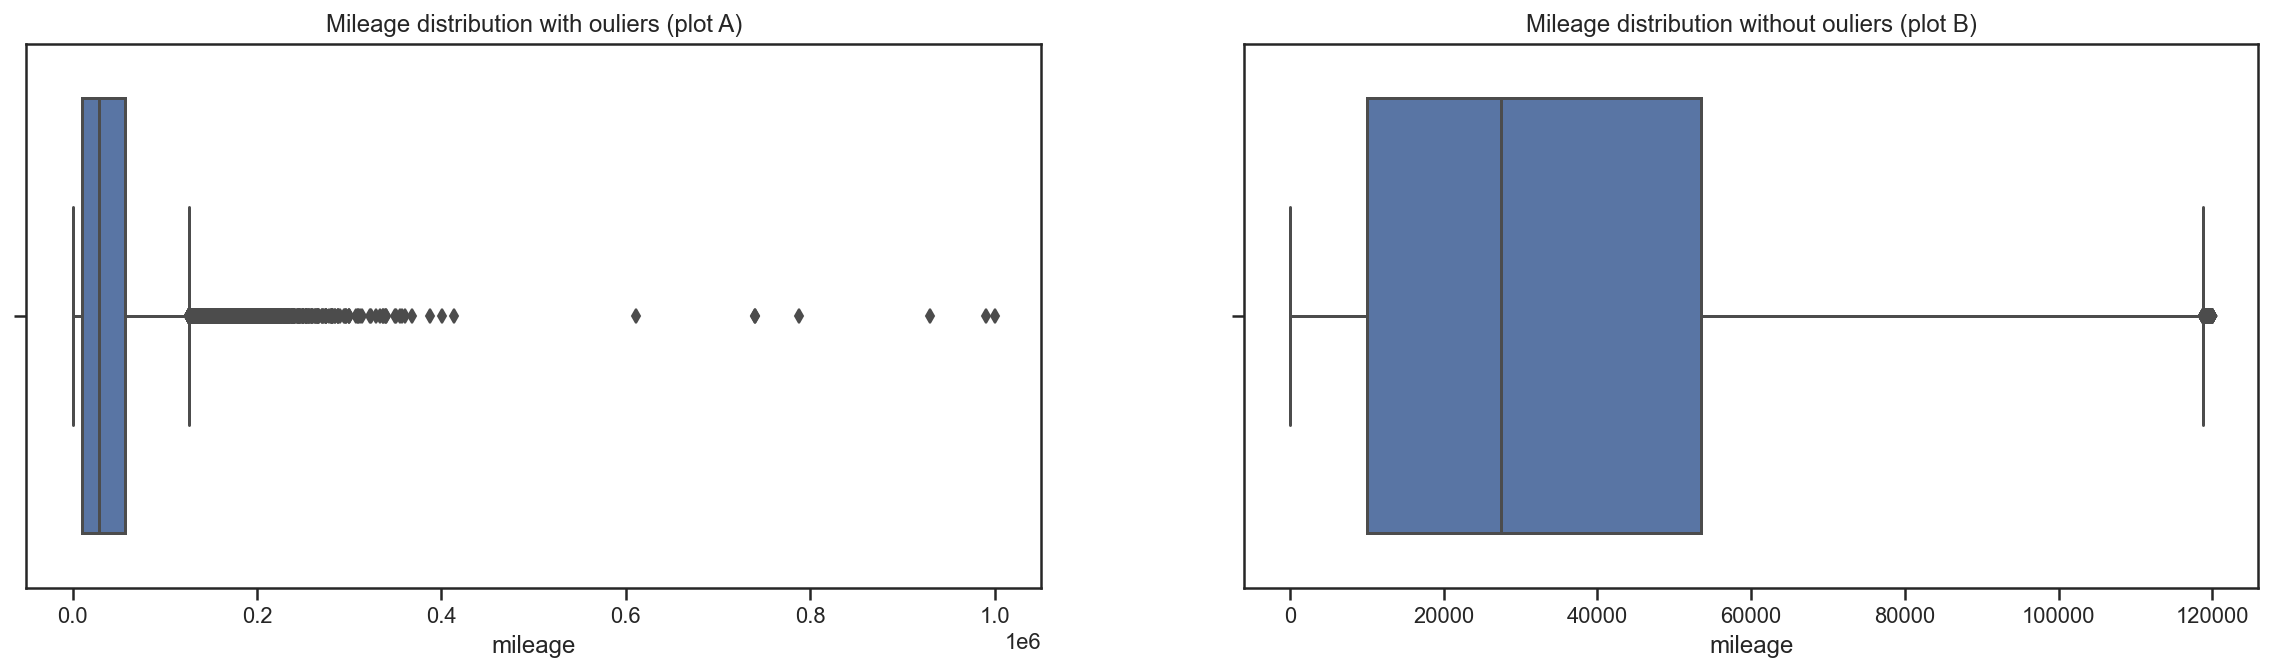

In [10]:
plt.figure(figsize=(20,5))

# Boxplot showing mileage distribution with outliers
plt.subplot(1,2,1)
sns.boxplot(data=auto, x='mileage')
plt.title("Mileage distribution with ouliers (plot A)")

#Removing majority of the outliers of mileage.
auto_in = auto[auto['mileage']<120000]

# Boxplot showing mileage distribution without outliers
plt.subplot(1,2,2)
sns.boxplot(data=auto_in, x='mileage')
plt.title("Mileage distribution without ouliers (plot B)")

* Plot A shows a wide margin between where the majority of the mileage values lie and the outliers. This validates the skewness to the left earlier mentioned.
* To get a better visualization, a plot without the outlier will suffice. 
* A box plot of the distribution after removing the majority of outliers is shown in plot B. This shows a better distribution, however, and confirms that 75% of the data is around 56875.75 as shown above. 

<AxesSubplot:xlabel='mileage', ylabel='Count'>

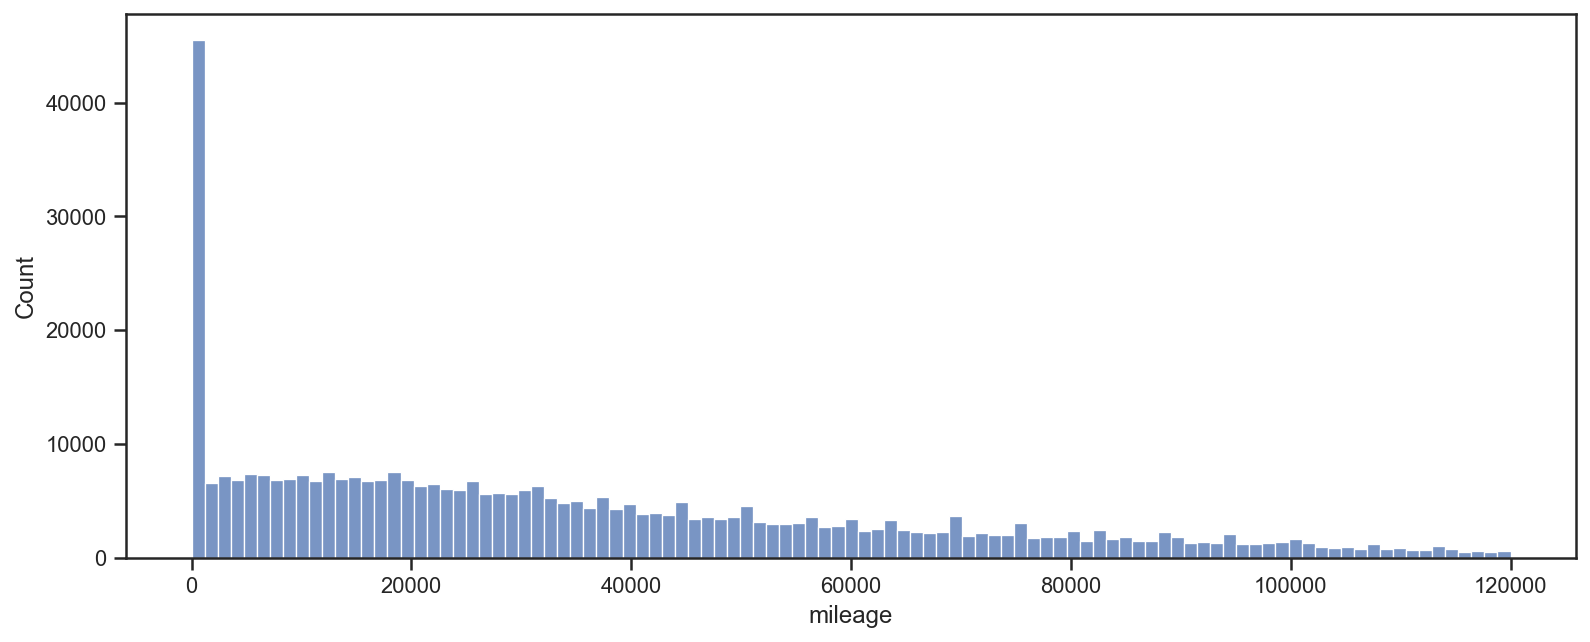

In [11]:
# Visuaizing the distribution of mileage without outliers
plt.figure(figsize=(13,5))
sns.histplot(data=auto_in, x='mileage')

* From the plot without outliers, it can be inferred that a relatively high number of cars in the dataset have mileages of 0.

### Price

In [12]:
# Summary statistics of price
auto['price'].describe()

count    4.020050e+05
mean     1.734197e+04
std      4.643746e+04
min      1.200000e+02
25%      7.495000e+03
50%      1.260000e+04
75%      2.000000e+04
max      9.999999e+06
Name: price, dtype: float64

* The most expensive car cost 9,999,999 and the least expensive car cost 120.
* The count of 402005 shows that there are no missing values.
* The average car price for new and used cars combined is 17,341.97.

<AxesSubplot:xlabel='price', ylabel='Count'>

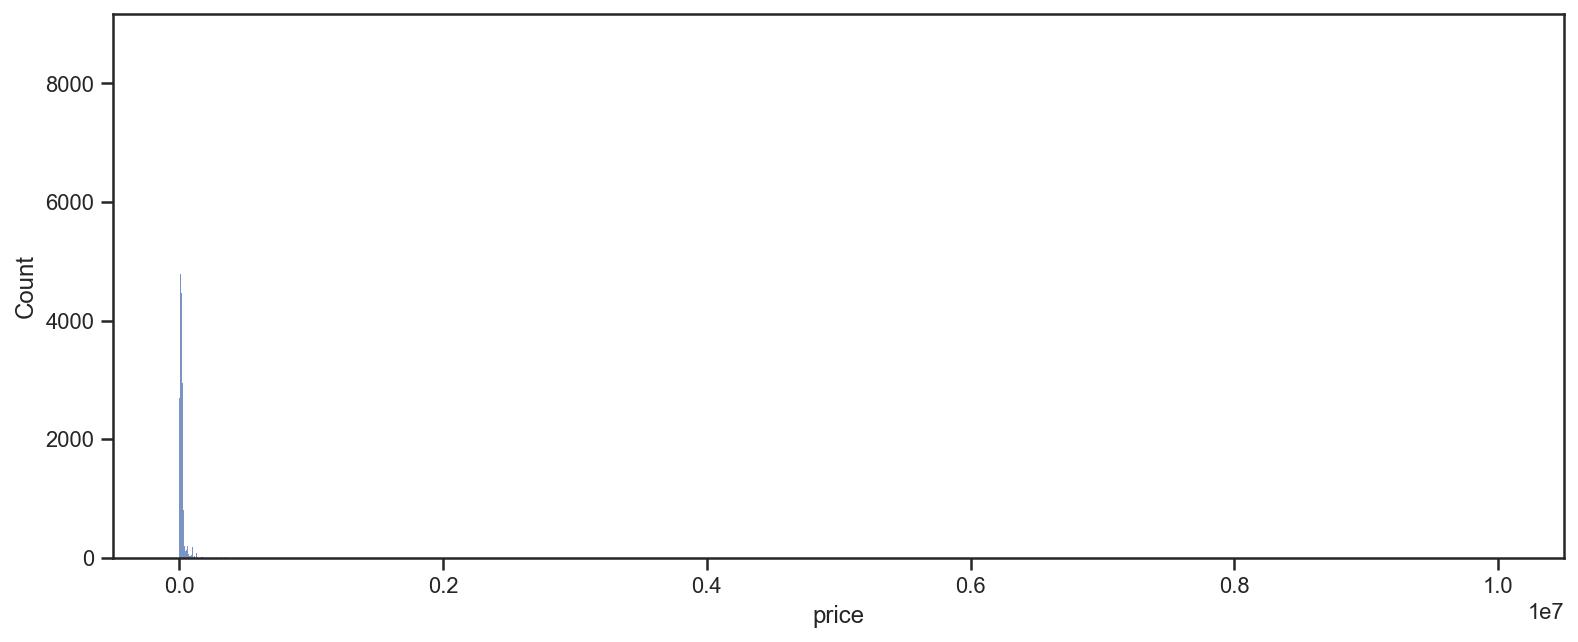

In [13]:
# Visuaizing the distribution of mileage
plt.figure(figsize=(13,5))
sns.histplot(data=auto, x='price')

* The distribution of price is also skewed to the left. This could also be as a result of outliers.

Text(0.5, 1.0, 'Price distribution with log transformation (plot 2)')

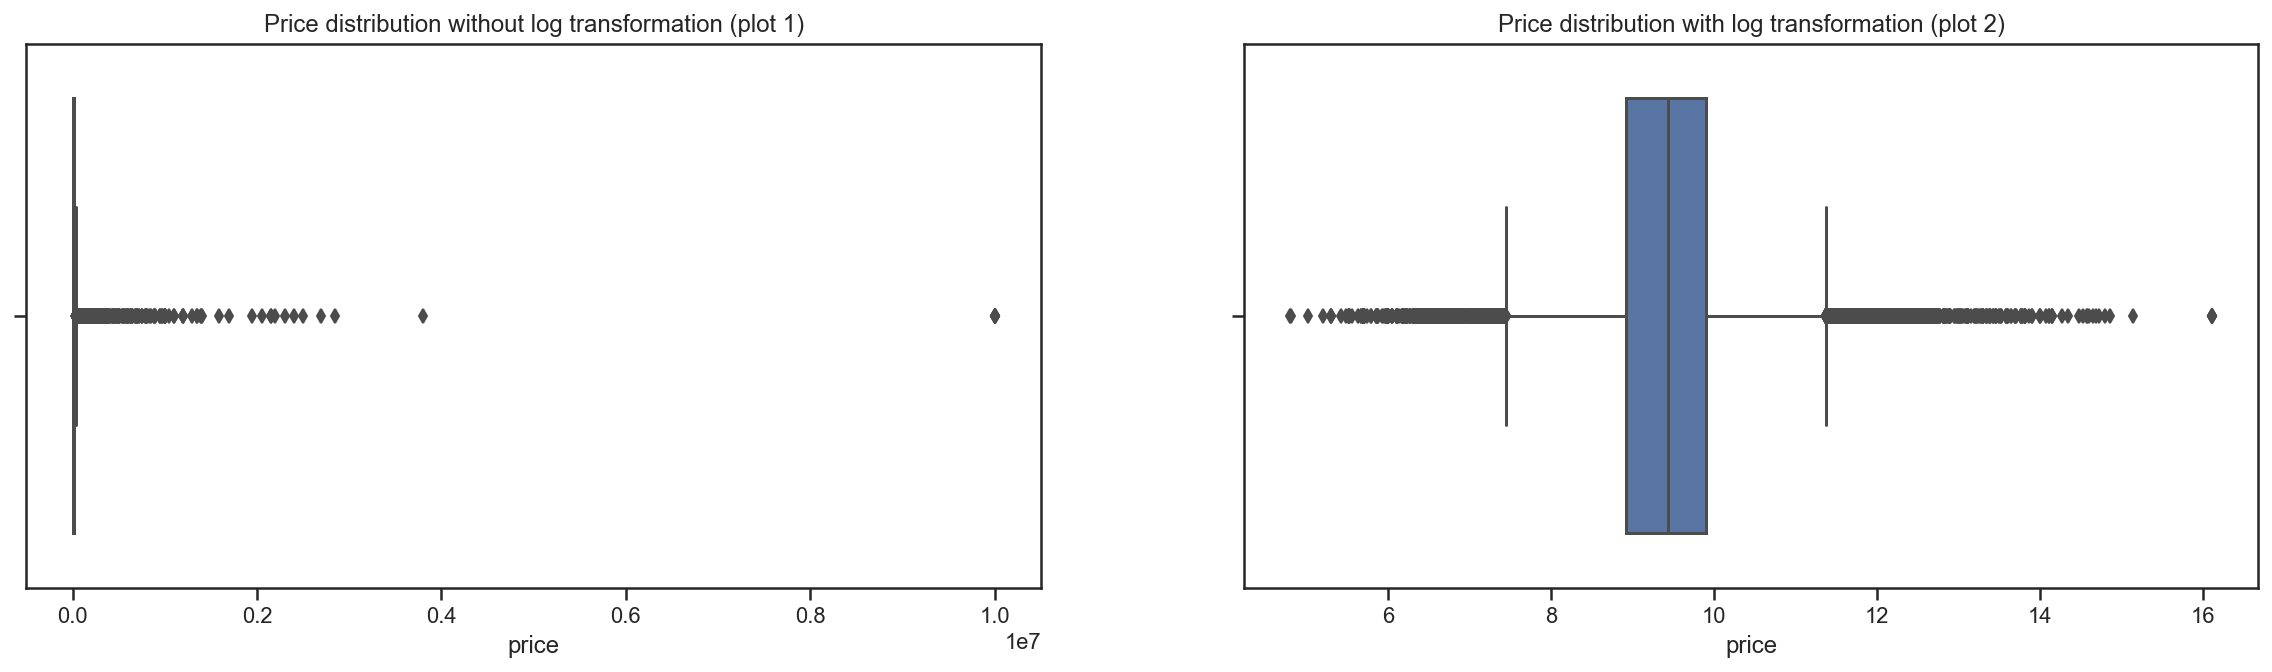

In [14]:
# Normalization of price distribution
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(data=auto, x='price')
plt.title("Price distribution without log transformation (plot 1)")

# Normalizing the price distribution with log1p.
price_log = np.log1p(auto['price'])

#Plotting distribution with log transformation
plt.subplot(1,2,2)
sns.boxplot(data=auto, x=price_log)
plt.title("Price distribution with log transformation (plot 2)")

* Plot 1 shows a wide margin between where the majority of the price values lie and the outliers. This validates the skewness to the left.
* A boxplot of the distribution after price normalization is shown in plot 2. Plot 2 also validates the mean from .describe() method i.e(e^9.75 = approximately around 17,000)

Text(0.5, 1.0, 'Price distribution with log transformation')

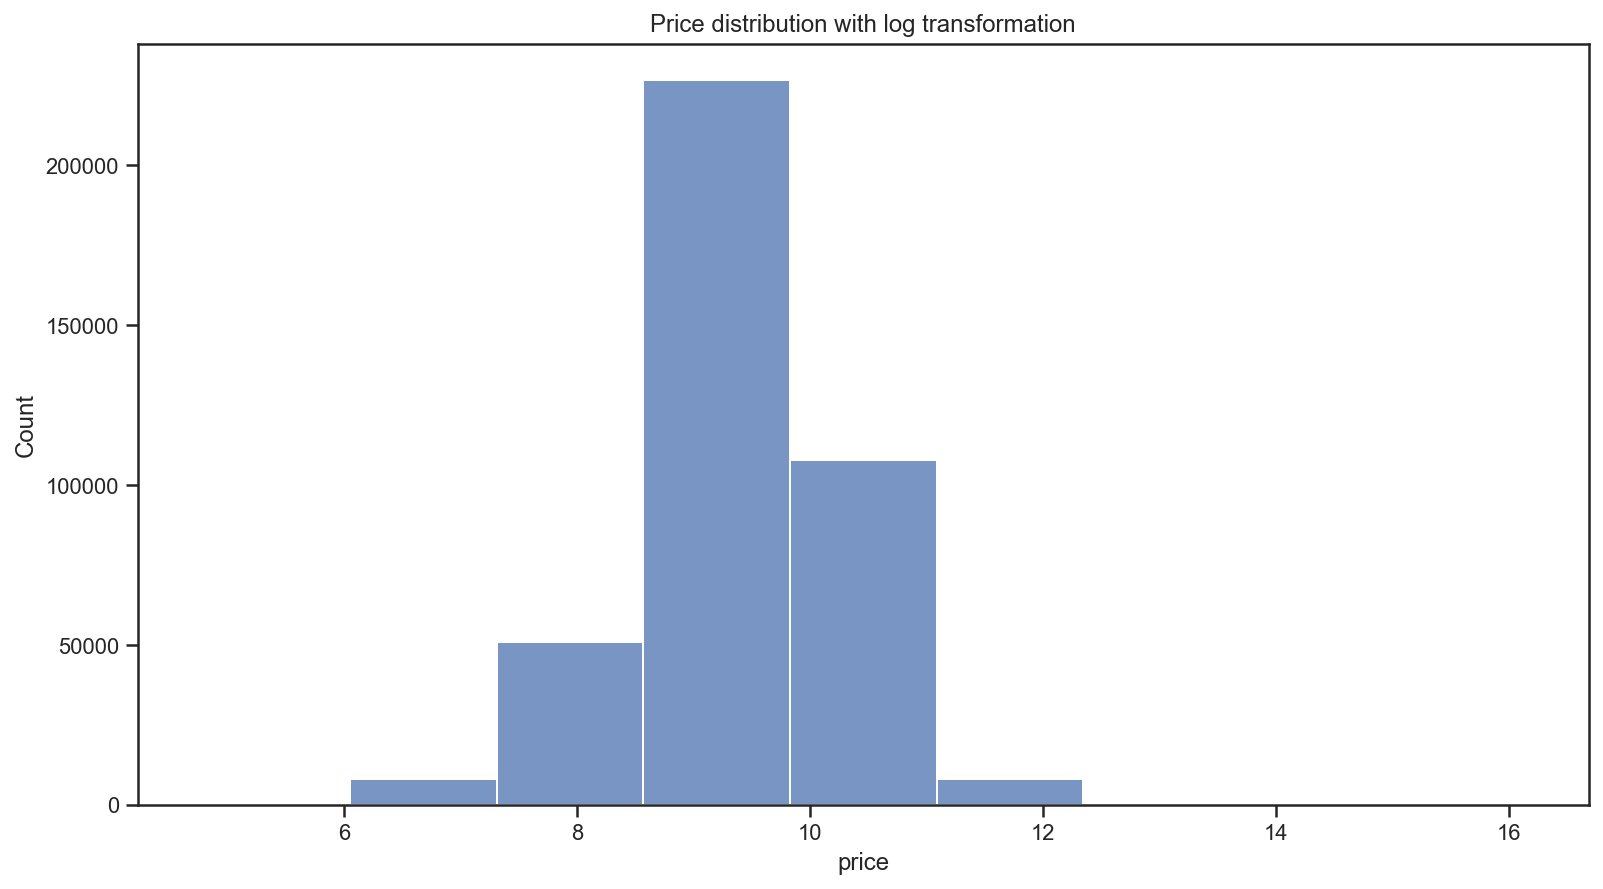

In [15]:
# Visuaizing the distribution of price after normalizing.
plt.figure(figsize=(13,7))

sns.histplot(data=auto, x=price_log, bins=9)
plt.title("Price distribution with log transformation")

* From the distribution plot after normalization,  it can be concluded that the majority of cars in the dataset cost approximately e^10 (i.e approximately 20,000). This validates the 75% quantile value of 2.000000e+04 from the describe() method.

### Fuel type

In [16]:
# Summary statistics of fuel type
auto['fuel_type'].describe()

count     401404
unique         9
top       Petrol
freq      216929
Name: fuel_type, dtype: object

* Most cars in the data set use petrol as fuel.
* The count of 401404 shows that there are a number of missing values.
* There 216929 petrol cars in the dataset.

<AxesSubplot:>

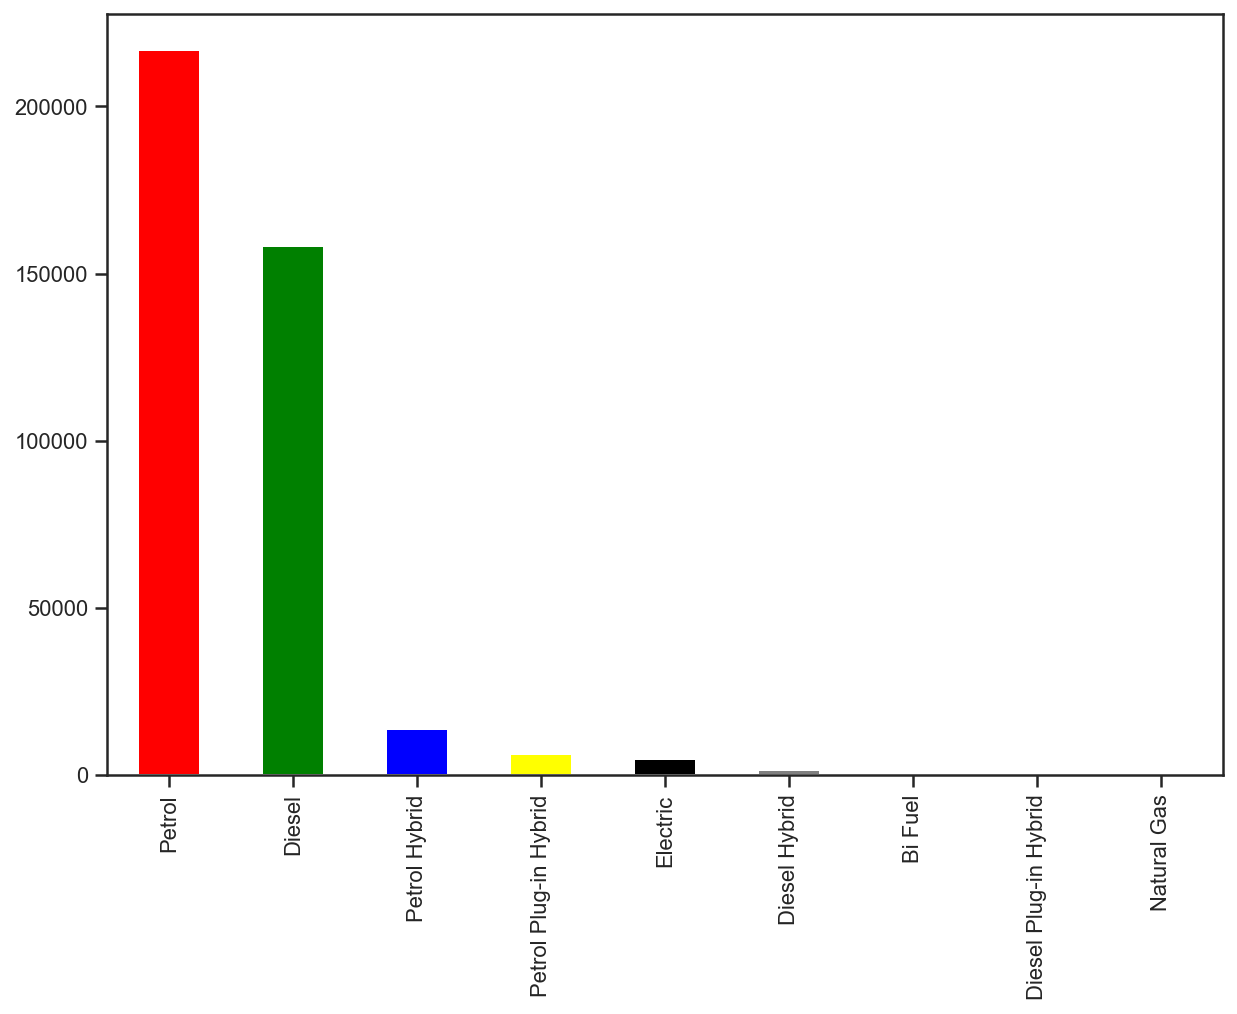

In [17]:
# Visuaizing the distribution of fuel type.
plt.figure(figsize=(10,7))

auto['fuel_type'].value_counts().plot(kind='bar', color=['red', 'green', 'blue', 'yellow', 'black', 'grey'])

* From the plot, it appears that there are more petrol cars in the dataset than any other fuel type.
* In addition to petrol vehicles, there are a significant number of diesel vehicles when compared to other fuel types.

### Vehicle condition

In [18]:
# Summary statistics of vehicle condition
auto['vehicle_condition'].describe()

count     402005
unique         2
top         USED
freq      370756
Name: vehicle_condition, dtype: object

* The majority of the vehicles in the data set are in use.
* The count of 402005 shows that there are no missing values.
* There are 370756 used cars in the dataset and 31249 new cars

<AxesSubplot:xlabel='vehicle_condition', ylabel='count'>

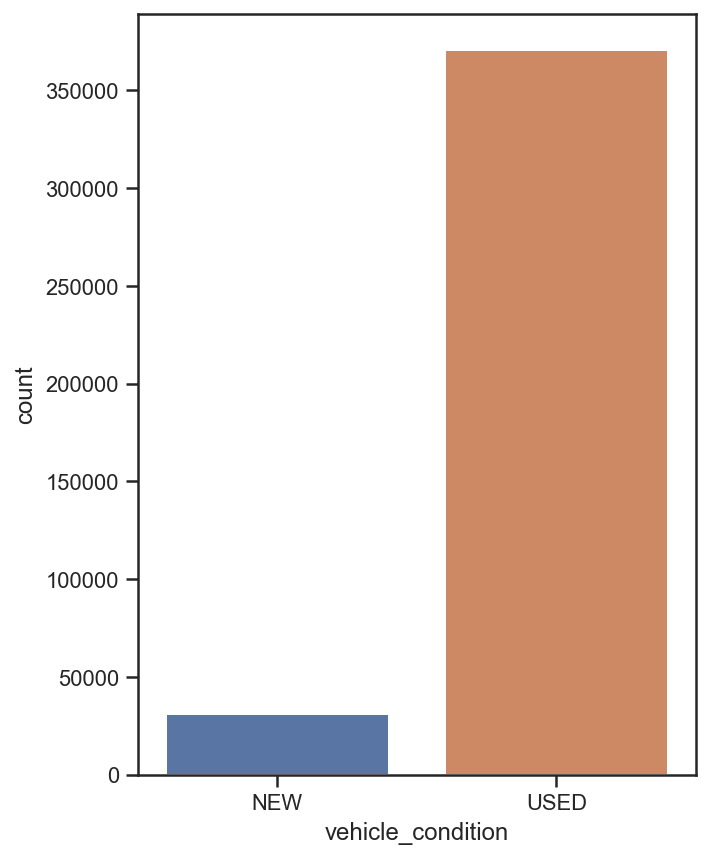

In [19]:
# Visuaizing the distribution of vehicle condition
plt.figure(figsize=(5,7))
sns.countplot(data=auto, x='vehicle_condition')

* The distribution plot validates the amount and frequency of vehicle conditions as stated in the describe() method. There are more used cars than new cars in the dataset.

### Year of registration

In [20]:
# Summary statistics of vehicle condition
auto['year_of_registration'].describe()

count    368694.000000
mean       2015.006206
std           7.962667
min         999.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2020.000000
Name: year_of_registration, dtype: float64

* The most recently bought cars were registered in 2020
* Having a registration year of 999 is probably an error and will be fixed in processing.

<AxesSubplot:xlabel='count', ylabel='year_of_registration'>

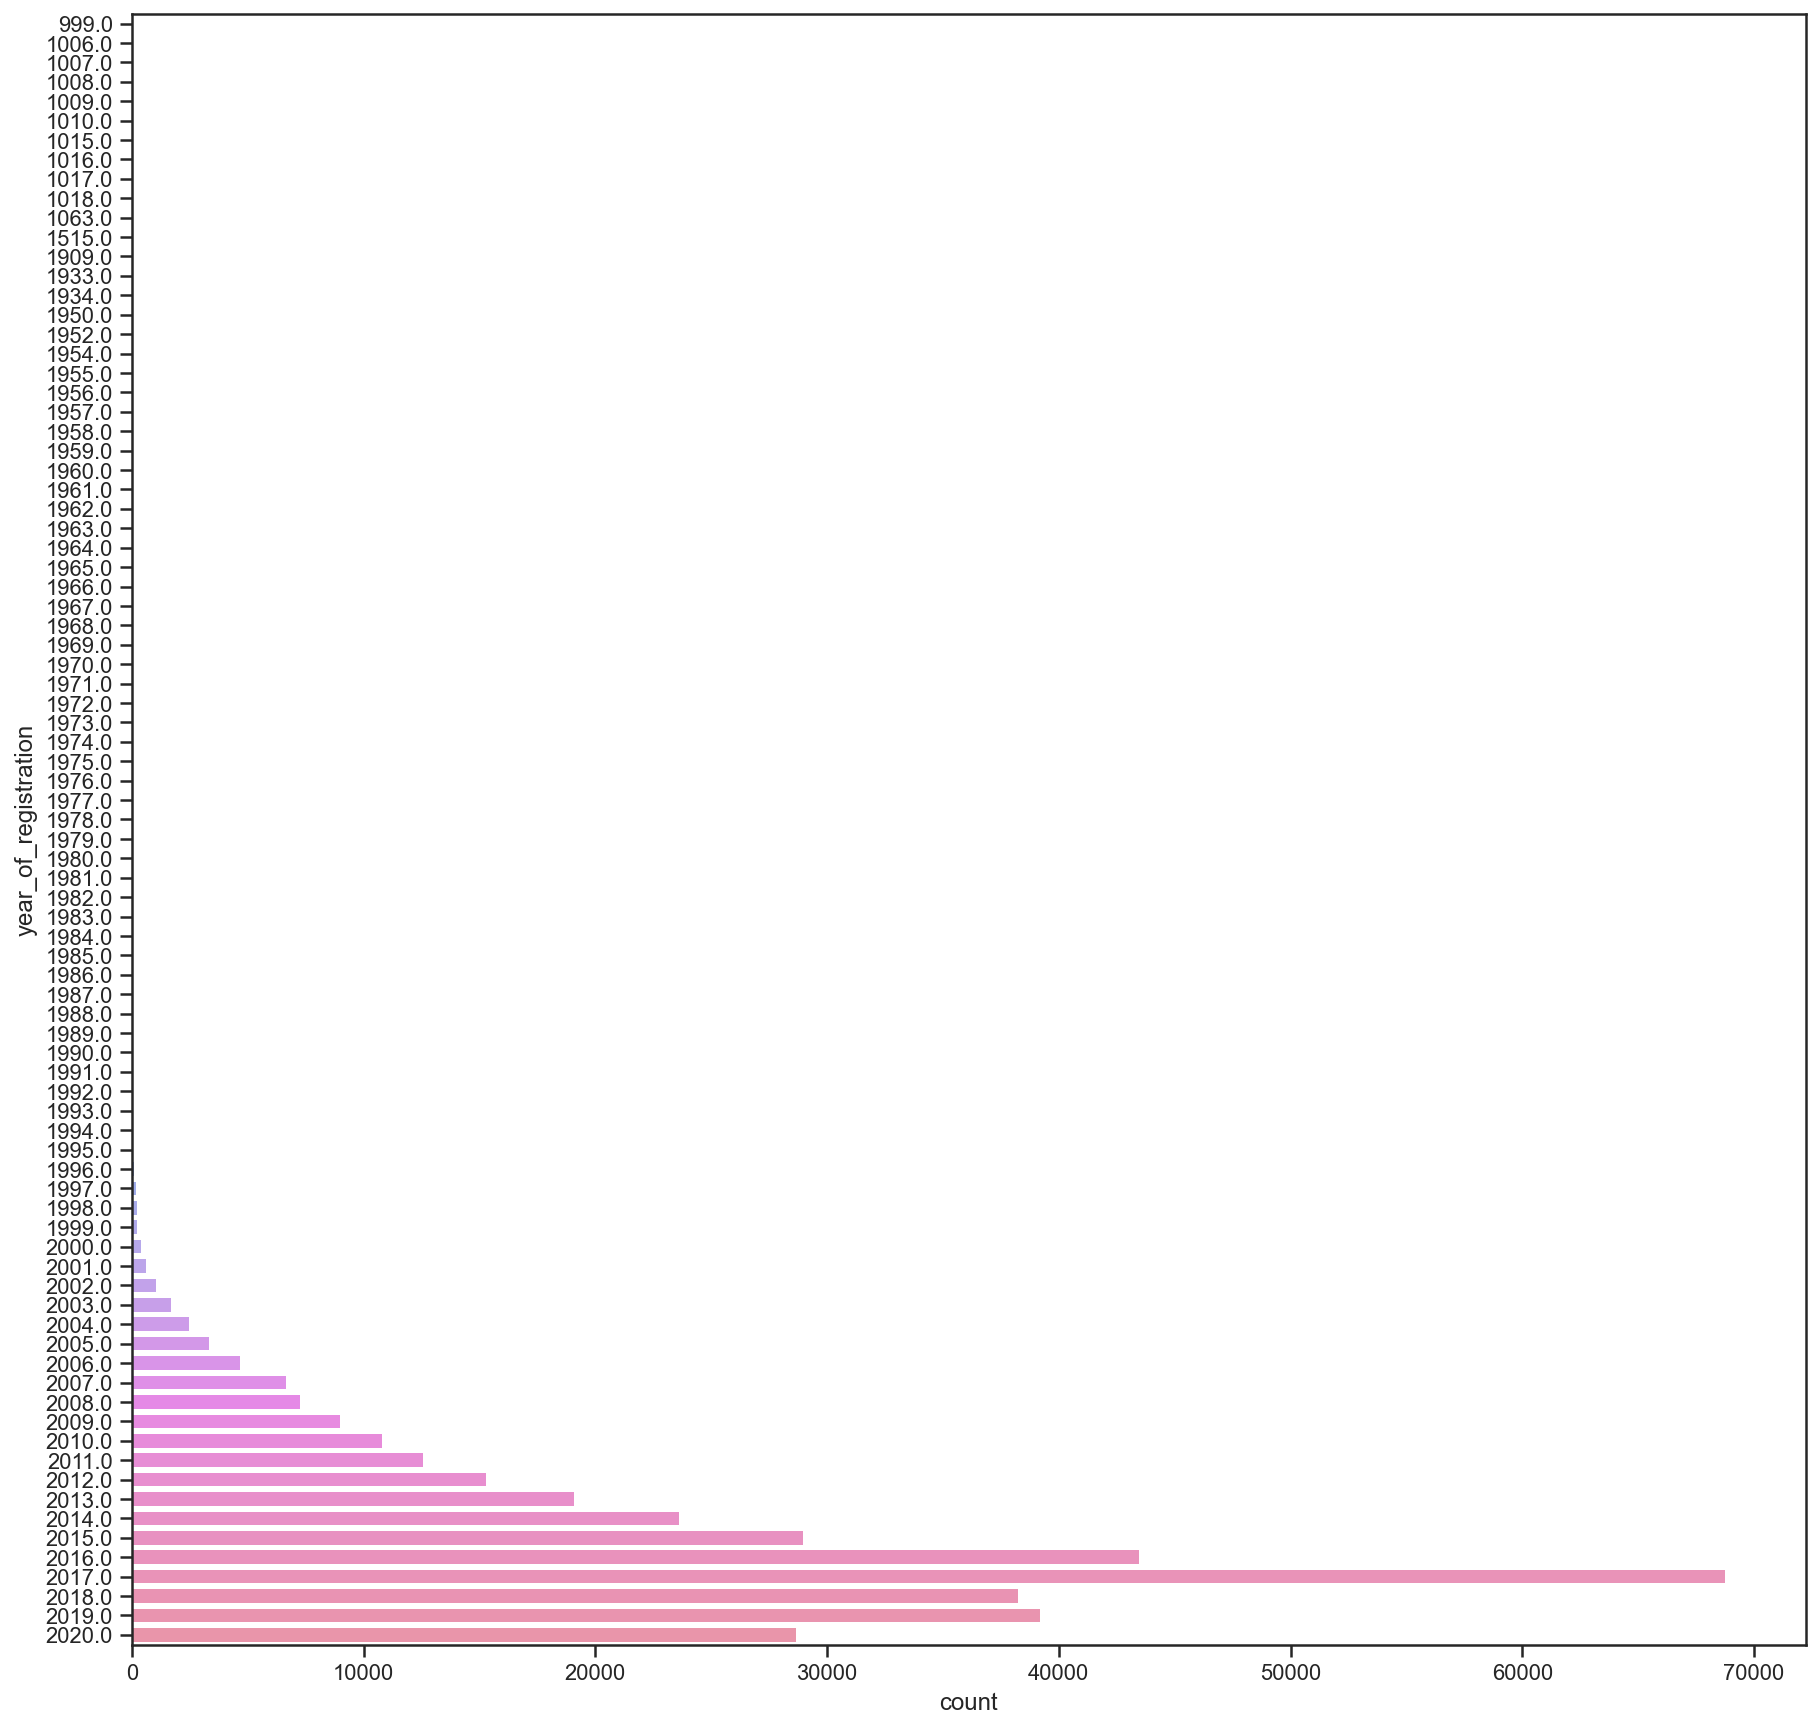

In [21]:
# Visuaizing the distribution of year of registration
plt.figure(figsize=(15,15))
sns.countplot(data=auto, y='year_of_registration')

* The plot shows that more cars were registered in 2017 compared to other years.

 ## 1.2. Identification/Commenting on Missing Values

<AxesSubplot:>

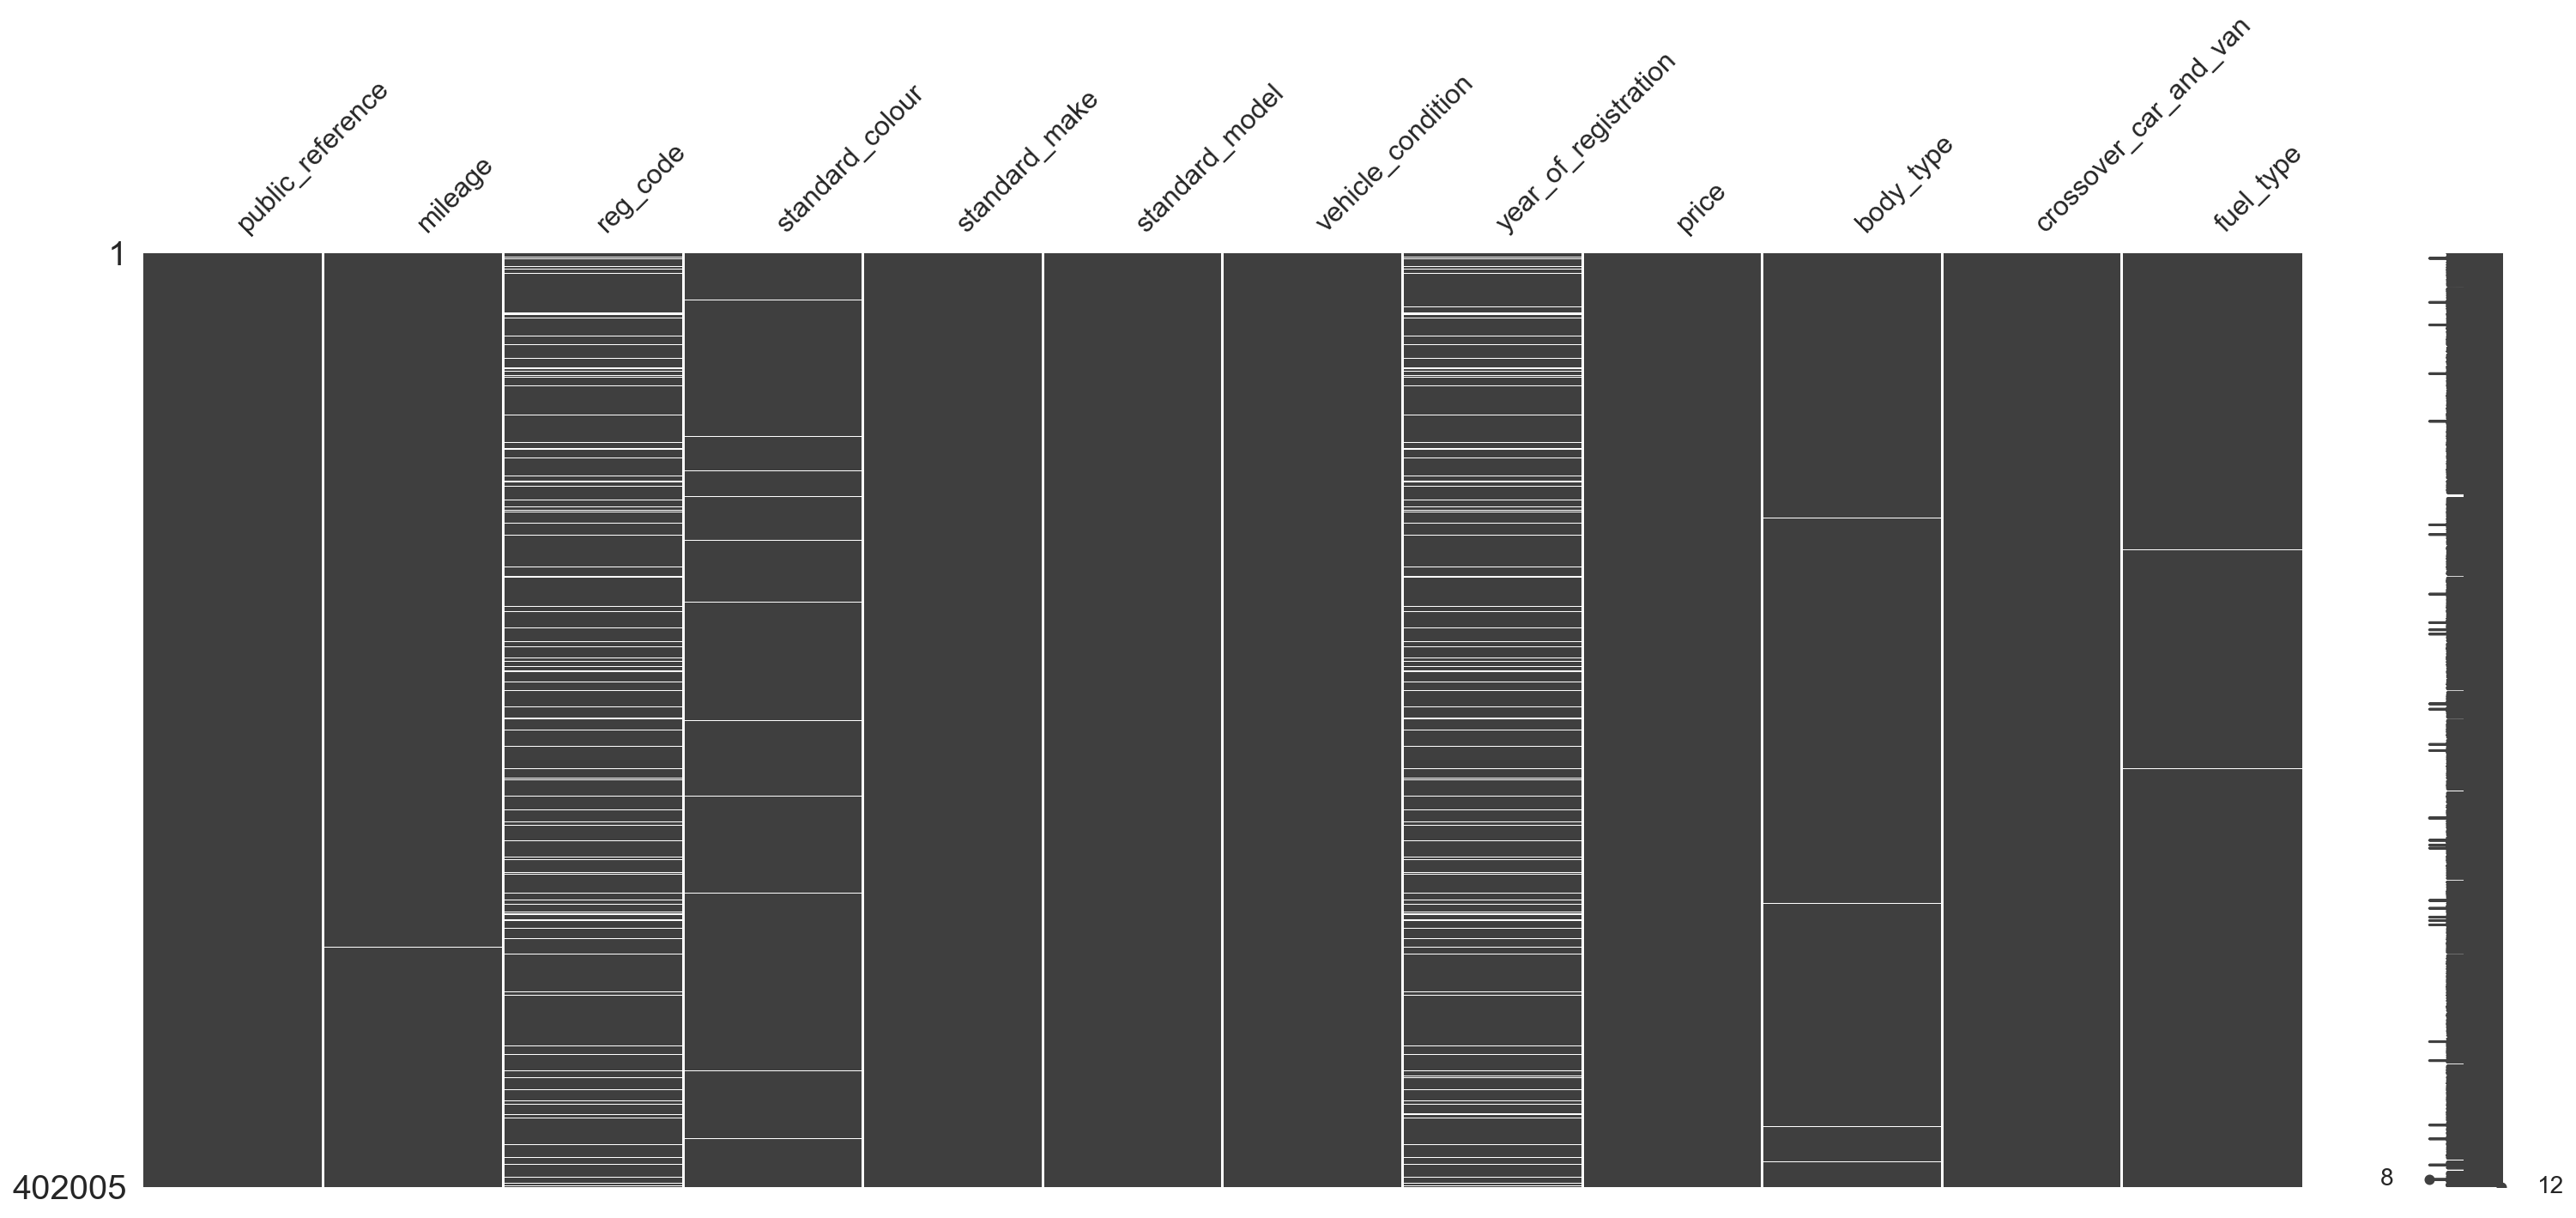

In [22]:
# Visualizing columns with missing values
msno.matrix(auto)

* The plot shows straightaway, that there are missing values in the mileage, registration code, standard color, year of registration, body type, and fuel type columns.

In [23]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


* The actual number of missing values in the mileage, reg_code, standard_color, year_of_registration, body_type, and fuel_type columns can be seen in the difference between the total number of rows in the dataset and the rows of the respective columns.

### Year of registration

In [24]:
# Checking the number of missing values in year of registration
auto[['year_of_registration']].isna().sum()

year_of_registration    33311
dtype: int64

* There are 33,311 missing values in the year of registration.

### Mileage

In [25]:
# Checking the number of missing values in mileage
auto[['mileage']].isnull().sum()

mileage    127
dtype: int64

* There are 127 missing values in mileage.

### Registration code

In [26]:
# Checking the number of missing values in registration code
auto[['reg_code']].isna().sum()

reg_code    31857
dtype: int64

* There are 31,857 missing values in registration code.

 ## 1.3. Identification/Commenting on Outliers and Noise

### Mileage

<AxesSubplot:xlabel='mileage'>

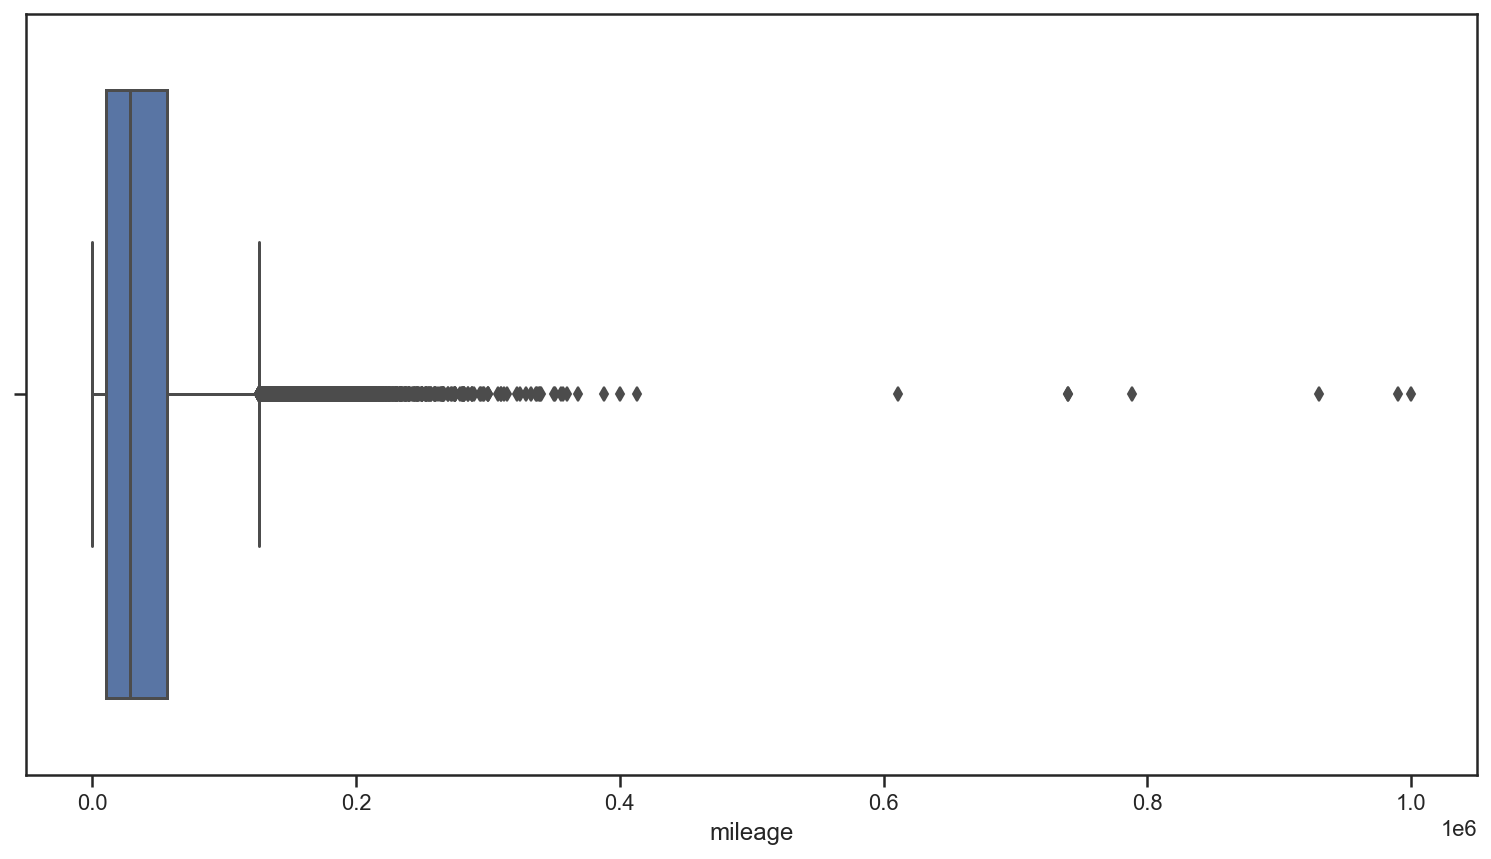

In [27]:
# Visualizing ouliers in mileage.
plt.figure(figsize=(13,7))
sns.boxplot(data=auto, x='mileage')

* The number of outliers in the dataset can be calculated using the "1.5 x IQR rule." 

* According to the "1.5 x IQR rule", outliers are defined as observations that fall outside of the following bounds: **Q1 - 1.5 * IQR <= Outlier <= Q3 + 1.5 * IQR** i.e. **Outliers = Total data points - (Total datapoints >= Q1 - 1.5 * IQR and <= Q3 + 1.5)** 
* IQR = interquartile range, is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of a dataset.

In [28]:
# Calculating the Interquartile range
Q1 = auto['mileage'].quantile(0.25)
Q3 = auto['mileage'].quantile(0.75)
IQR = Q3 - Q1

# Finding Non-outliers
non_outliers = (auto.mileage[(auto['mileage'] >= (Q1 - 1.5 * IQR)) & (auto['mileage'] <= (Q3 + 1.5 * IQR))]).count()
non_outliers

# Finding Outliers
outliers = auto.mileage.count() - non_outliers
outliers

8181

* There are 8,181 outliers in the mileage feature.

### Year of registration

<AxesSubplot:xlabel='year_of_registration'>

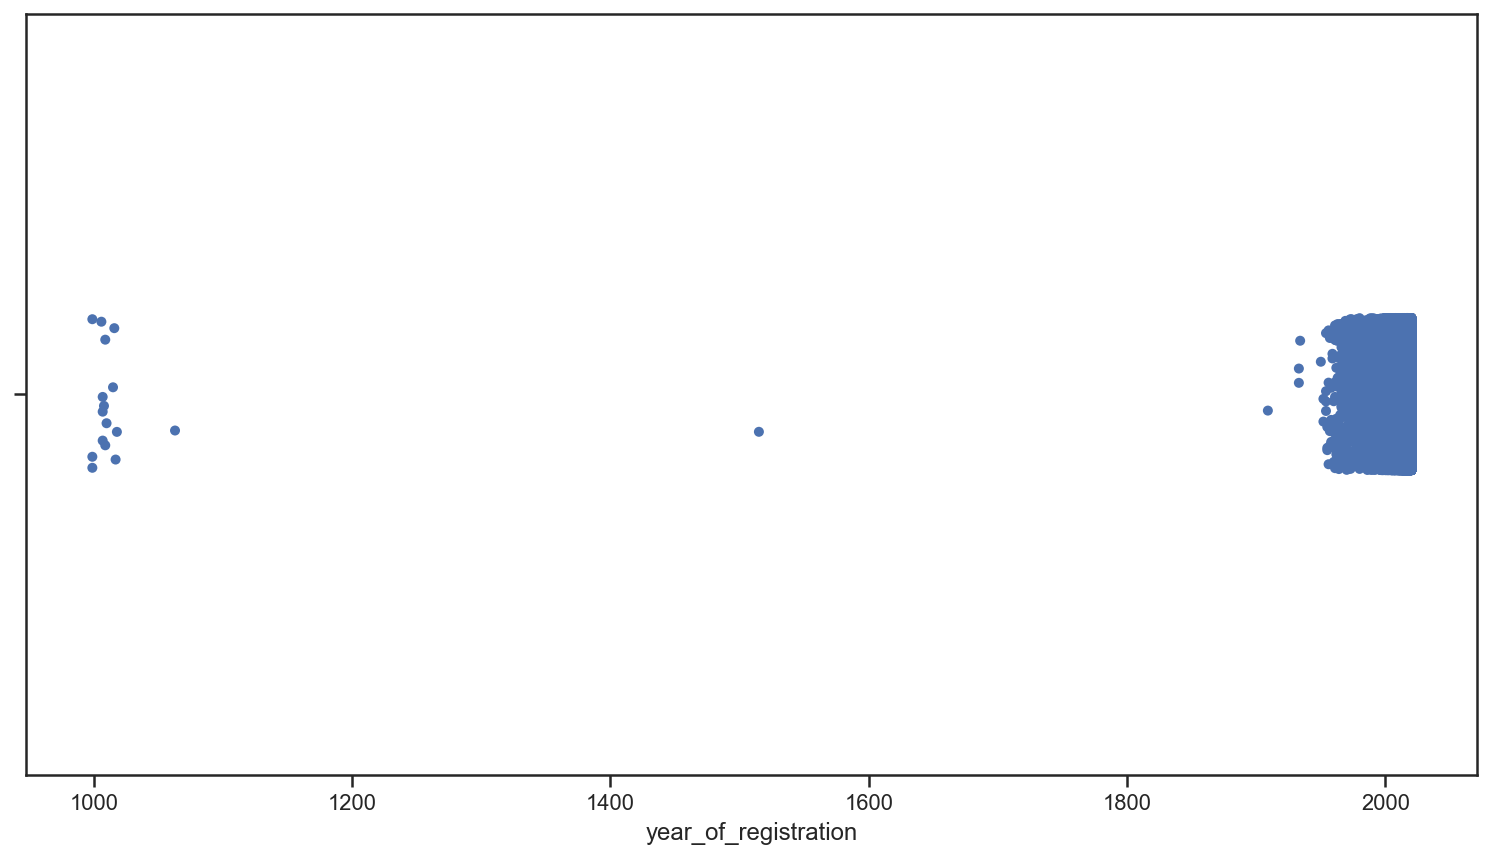

In [29]:
# Visualizing ouliers in year of registration
plt.figure(figsize=(13,7))
sns.stripplot(data=auto, x='year_of_registration')

* From looking at the plot, there are some outliers in the year of registration.
* In addition, car manufacturing began in 1886, according to domain understanding. However, there is the possibility of correcting the values with the information in registration codes.
* Additionally, a significant number of vehicles have a registration year of zero. These may be for new cars.

### Price

<AxesSubplot:xlabel='price'>

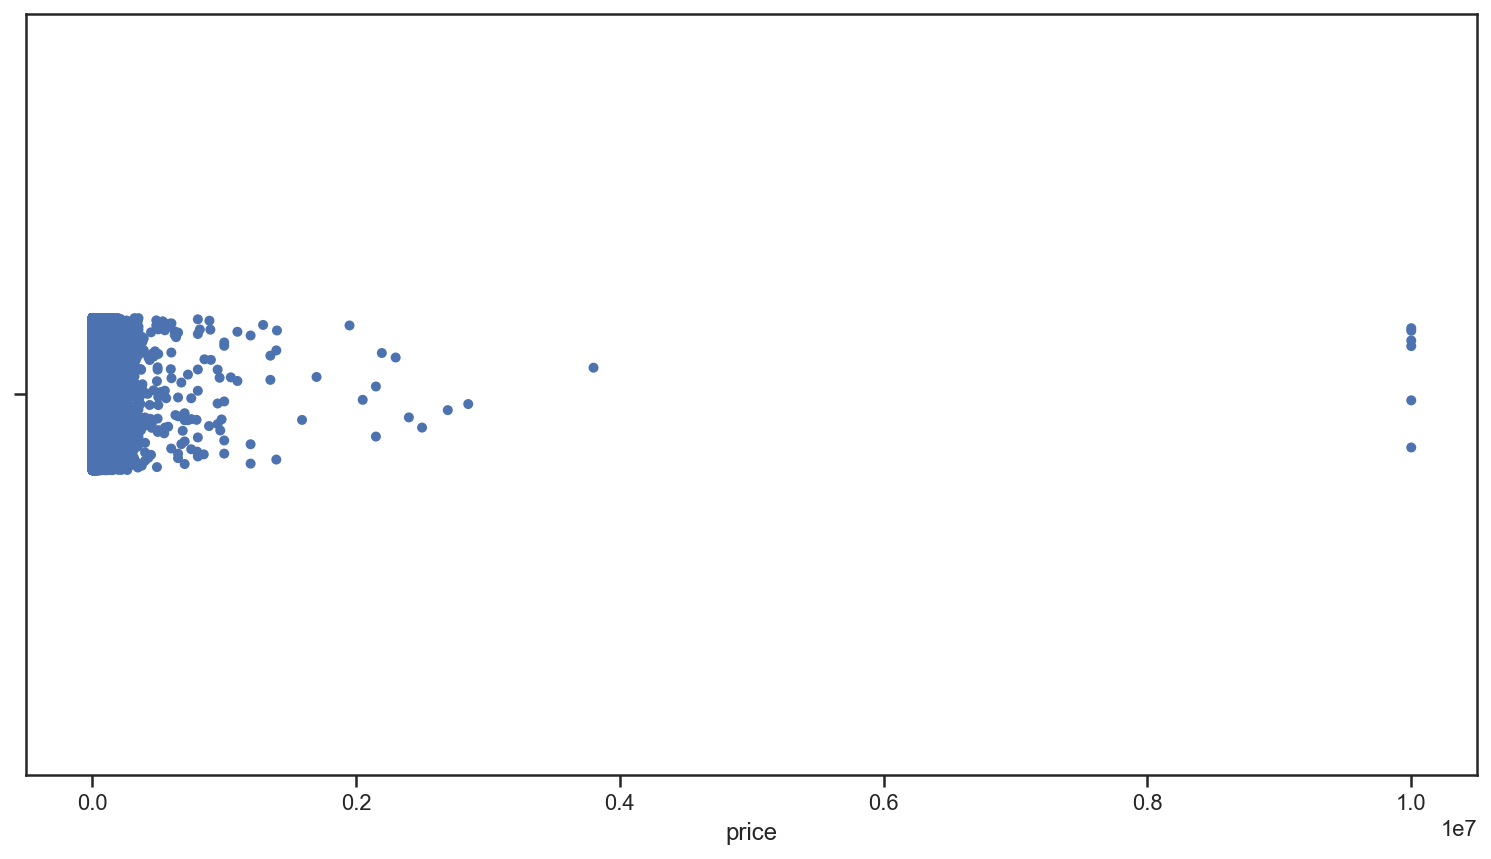

In [30]:
# Visualizing ouliers in price
plt.figure(figsize=(13,7))
sns.stripplot(data=auto, x='price')

There are some outliers in car prices. These are likely to be very expensive cars or error values, following the pattern. 

# 2. Data Processing

## 2.1. Dealing with Missing Values, Outliers, and Noise

* Before dealing with missing values, there is need to tidy up the objects and take care of the spaces.

In [31]:
# Objects columns:
object_columns = ['standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 
                  'body_type', 'fuel_type']

# Tidying up the object columns
auto['standard_colour'] = auto.standard_colour.str.lower().replace(' ','_')
auto['standard_make'] = auto.standard_make.str.lower().replace(' ','_')
auto['standard_model'] = auto.standard_model.str.lower().replace(' ','_')
auto['vehicle_condition'] = auto.vehicle_condition.str.lower().replace(' ','_')
auto['body_type'] = auto.body_type.str.lower().replace(' ','_')
auto['fuel_type'] = auto.fuel_type.str.lower().replace(' ','_')

auto.sample(4)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
142821,202010014440845,41557.0,17,black,mercedes-benz,cla class,used,2017.0,15500,coupe,False,petrol
276479,202007131185226,34255.0,67,white,vauxhall,corsa,used,2017.0,7699,hatchback,False,petrol
312916,202011015670454,86000.0,58,black,fiat,bravo,used,2008.0,1250,hatchback,False,diesel
247002,202010134931192,12055.0,69,blue,volkswagen,golf,used,2019.0,19800,hatchback,False,diesel


### Year of registration

From domain understanding (Wikipedia, 2023): vehicle registration plates of the United Kingdom. [Online] [Accessed on 22nd December 2022] https://en.wikipedia.org/wiki/Vehicle_registration_plates_of_the_United_Kingdom), there is a relationship between the registration code and the year or registration. 

Following that, the registration code and year of registration will be analyzed jointly to fill in the year of registration's missing values.

In [32]:
# Rows with missing year of registration and registration code.
auto[auto['year_of_registration'].isna() & auto['reg_code'].isna()].shape

(31570, 12)

* There are 31,570 rows with both the year of registration and registration code missing.

In [33]:
# Rows with missing year of registration without missing registration code
auto[auto['year_of_registration'].isna() & auto['reg_code'].notna()].shape

(1741, 12)

* There are 1,741 rows with missing years of registration without missing registration code values.

In [34]:
# Rows where news cars have missing year of registration
auto[(auto['vehicle_condition']=='new') & (auto['year_of_registration'].isna())].shape

(31249, 12)

* There are 31,249 rows where new cars have a missing year of registration. The missing values will be filled with 0. This conclusion is drawn from the domain's understanding that new cars do not have a year of registration as they have not been purchased by a user. Also, the equivalent registration code is 0. 

In [35]:
#Filling rows where news cars have missing year of registration with 0
auto.loc[auto['vehicle_condition']=='new' ,'year_of_registration'] = 0

# Filling the equivalent reg_code with 0
auto.loc[auto['year_of_registration']== 0 ,'reg_code'] = 0

In [36]:
auto.head(2)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,0,grey,volvo,xc90,new,0.0,73970,suv,False,petrol plug-in hybrid
1,202007020778260,108230.0,61,blue,jaguar,xf,used,2011.0,7000,saloon,False,diesel


In [37]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               401397 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   399943 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


* After filing the rows where news cars have missing year of registration with 0 and also filling the equivalent reg_code with 0, it can be observed from the info() method that there are still rows with reg_code that have a missing year of registration.

In [38]:
# Checking the rows with registration code and missing year of registration.
auto[(auto['reg_code'].notna()) & (auto['year_of_registration'].isna())].shape

(1741, 12)

* There are 1,741 rows with registration codes that have missing year of registration.

In fixing the rows with reg_code that have missing year of registration, it will make sense at this stage to drop all the rows with missing year of registration and registration code first, before moving forward. From domain understanding, there are no ways of filling those rows; except trying to seek the information from the business owners directly.

In [39]:
# Rows with missing year of registration and registration code
auto[(auto['reg_code'].isna()) & (auto['year_of_registration'].isna())].shape

(321, 12)

In [40]:
# Dropping rows with missing year of registration and registration code
auto = auto.loc[~((auto['reg_code'].isna()) & (auto['year_of_registration'].isna()))]

In [41]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401684 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       401684 non-null  int64  
 1   mileage                401569 non-null  float64
 2   reg_code               401397 non-null  object 
 3   standard_colour        396332 non-null  object 
 4   standard_make          401684 non-null  object 
 5   standard_model         401684 non-null  object 
 6   vehicle_condition      401684 non-null  object 
 7   year_of_registration   399943 non-null  float64
 8   price                  401684 non-null  int64  
 9   body_type              400906 non-null  object 
 10  crossover_car_and_van  401684 non-null  bool   
 11  fuel_type              401091 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 37.2+ MB


* After dropping the rows with missing year of registration and registration code, there are a total of 401,684 rows and 12 columns.
* There are still some missing values in the "year of registration" column. The registration code will be engineered to fill in the values. 

In [42]:
# Checking the unique values of registration code
auto['reg_code'].unique()

array([0, '61', '17', '16', '64', '13', '08', '19', '60', '69', '66',
       '12', '18', '65', '09', 'B', '10', '14', '03', '67', '63', '15',
       '68', '56', '20', '70', '62', '11', '05', '59', '58', 'W', '02',
       '57', '06', '52', '53', '04', 'J', '07', '55', '51', nan, 'X', 'D',
       'S', 'Y', '54', 'H', 'K', 'E', 'L', 'V', 'M', 'G', 'T', 'N', 'P',
       'A', 'F', 'R', 'C', '94', '85', 'CA', 'm', 'FW', '723xuu', '95',
       's', '38', 'k', '37', 'p'], dtype=object)

* It can be observed that there are still rows with missing registration codes (nan). 
* At this stage: 
1. Using the information provided in the domain understanding, the registration codes are filled with the year of registration
2. The missing values in the year of registration are then filled with the corresponding registration code afterward.

In [43]:
# Creating a subset of rows with year of registration and missing registration code (mxx_reg_code)
mxx_reg_code = auto[auto['year_of_registration'].notna() & auto['reg_code'].isna()][['year_of_registration', 'reg_code']]
mxx_reg_code.head(3)

,year_of_registration,reg_code
630,2019.0,NaN
682,2006.0,NaN
1131,2004.0,NaN


In [44]:
# Shape of mxx_reg_code
mxx_reg_code.shape

(287, 2)

* There are 287 of such rows

In [45]:
# Checking the unique values of mixx_reg_code
mxx_reg_code['year_of_registration'].unique()

array([2019., 2006., 2004., 2017., 2018., 2020., 2005., 1962., 2015.,
       2007., 2010., 2009., 2000., 2013., 1933., 1998., 2012., 1961.,
       2008., 1997., 2016., 1957., 2002., 1999., 2014., 1988., 1954.,
       1955., 1963., 2011., 1960., 1956., 2003., 1959., 1990., 1992.,
       1958., 1950., 1966., 1994., 1973., 1987., 1964., 1995., 1952.,
       2001., 1991.])

In [46]:
mapping_dictionary1 = {2019.0 : '19',2006.0 : '55', 2004.0 : '04', 2017.0 : '17', 2018.0 : '67', 2020.0 : '20', 2005.0 : '05',
       1962.0 : 'NIL', 2015.0 : '64', 2007.0 : '07', 2010.0: '10', 2009.0 : '09', 2000.0 : 'Y', 2013.0 : '13', 
       1933.0 : 'NIL', 1998.0 : 'S', 2012.0 : '61', 1961.0: 'NIL',2008.0 : '57', 1997.0 : 'R', 2016.0 : '65', 
       1957.0 : 'NIL', 2002.0 : '02', 1999.0 : 'T', 2014.0 : '14', 1988.0 : 'R', 1954.0 : 'NIL', 1955.0 : 'NIL', 
       1963.0 : 'A', 2011.0 : '11', 1960.0 : 'NIL', 1956.0 : 'NIL', 2003.0 : '03', 1959.0 : 'NIL', 1990.0 : 'G', 
       1992.0 : 'K',1958.0: 'NIL', 1950.0 : 'NIL', 1966.0 : 'D', 1994.0 : 'L', 1973.0 : 'L', 1987.0: 'D', 
       1964.0 : 'B', 1995.0 : 'M', 1952.0 : 'NIL', 2001.0 : 'Y', 1991.0 : 'H'}

* A dictionary of the unique values of the registration code in subset mxx_reg_code (i.e rows with missing registration code without missing year of registration) is created. The keys are the unique years and the values are the associated registration codes from the age and year identifier tables from the domain understanding. 
* According to the information provided, the registration code for years above 1963 was discontinued and, hence, has no definite value. As a result, the values were represented as "NIL" and were dropped following mapping.

In [47]:
# Mapping the year of registration column with mapping_dictionary1 and assigning it to the original dataset
mxx_reg_code['reg_code'] = mxx_reg_code['year_of_registration'].map(mapping_dictionary1)

In [48]:
# Checking the shape of rows with 'NIL'
mxx_reg_code[mxx_reg_code['reg_code'] == 'NIL'].shape

(42, 2)

In [49]:
#Joining the mapped dataset with the original dataframe
auto.loc[(auto['year_of_registration'].notna()) & (auto['reg_code'].isna()), ['year_of_registration', 'reg_code']] = mxx_reg_code

In [50]:
# Dropping the rows with 'NIL' registration code
auto = auto.loc[~((auto['reg_code'] == 'NIL'))]

In [51]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401642 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       401642 non-null  int64  
 1   mileage                401528 non-null  float64
 2   reg_code               401642 non-null  object 
 3   standard_colour        396294 non-null  object 
 4   standard_make          401642 non-null  object 
 5   standard_model         401642 non-null  object 
 6   vehicle_condition      401642 non-null  object 
 7   year_of_registration   399901 non-null  float64
 8   price                  401642 non-null  int64  
 9   body_type              400872 non-null  object 
 10  crossover_car_and_van  401642 non-null  bool   
 11  fuel_type              401055 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 37.2+ MB


###### After dealing with the rows left with missing registration codes (nan), The.info() method reveals the following:
    1. The total number of rows and columns is now 401,642 and 12 respectively
    2. There are no more missing values in the registration code.
    3. At this stage, the registration codes are used to fill in the missing values for the year of registration.

In [52]:
# Checking the rows with registration code but missing year of registration 
auto[auto['year_of_registration'].isna()].shape

(1741, 12)

To fill in the missing values of the year of registration with the registration codes:
1. A copy of the original dataframe is created, with all rows missing year_of_registration dropped.
2. The dataframe copy is grouped by the reg_code column.
3. The mode of the year_of_registration column for each group is calculated and converted from a series to a dataframe. Missing values are dropped.
4. A dictionary with reg_code as the key and the mode of the year_of_registration as the value is created.
5. The missing values in the year_of_registration column are then filled by mapping the values in the reg_code column to the corresponding values in the dictionary.

In [53]:
# Creating a copy of the original dataFrame with all rows having missing year_of_registration dropped.
auto_ndrop = auto[~auto['year_of_registration'].isna()]

In [54]:
# Grouping the copy by the reg_code column
auto_ndrop_grp = auto_ndrop.groupby('reg_code')['year_of_registration']

In [55]:
from scipy import stats

# Calculating the mode of the year_of_registration column for each group, converting to a dataframe and dropping any missing values
auto_ndrop_mode = auto_ndrop_grp.agg(lambda x: stats.mode(x)[0][0]).to_frame().dropna()

In [56]:
# Creating a dictionary with reg_code as key and the mode of the year_of_registration as value
auto_ndrop_mode_dict = dict(zip(auto_ndrop_mode.index, auto_ndrop_mode.loc[:,'year_of_registration']))

In [57]:
# Filling the the year_of_registration column by mapping the values in the reg_code column to the corresponding values in the dictionary and assigning it to original data frame.
auto.loc[:,'year_of_registration'] = auto.loc[:,'year_of_registration'].fillna(auto.loc[:,'reg_code'].map(auto_ndrop_mode_dict))

In [58]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401642 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       401642 non-null  int64  
 1   mileage                401528 non-null  float64
 2   reg_code               401642 non-null  object 
 3   standard_colour        396294 non-null  object 
 4   standard_make          401642 non-null  object 
 5   standard_model         401642 non-null  object 
 6   vehicle_condition      401642 non-null  object 
 7   year_of_registration   401633 non-null  float64
 8   price                  401642 non-null  int64  
 9   body_type              400872 non-null  object 
 10  crossover_car_and_van  401642 non-null  bool   
 11  fuel_type              401055 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 37.2+ MB


After filing the missing year of registration rows with the registration code, it is observed that there are still 9 rows with missing year of registration.

In [59]:
# Checking the 9 rows with missing values.
auto[auto['year_of_registration'].isna()]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
9940,202010225293464,32001.0,94,orange,renault,captur,used,NaN,7400,suv,False,petrol
28559,202010215252376,58686.0,85,black,hyundai,i30,used,NaN,6900,NaN,False,diesel
80899,202010014455127,2000.0,CA,green,caterham,seven,used,NaN,21995,convertible,False,petrol
166035,202010195172029,4050.0,723xuu,turquoise,chevrolet,corvette,used,NaN,89990,NaN,False,petrol
167430,202010225293472,55643.0,95,grey,citroen,ds4,used,NaN,6800,hatchback,False,diesel
231213,202010225293467,61370.0,94,black,vauxhall,mokka,used,NaN,7450,NaN,False,diesel
265390,201912315687909,23157.0,38,black,mercedes-benz,e class,used,NaN,26550,NaN,False,diesel
329449,202010225293425,39312.0,95,silver,renault,captur,used,NaN,8000,suv,False,petrol
357325,202010215252378,31487.0,37,white,suzuki,baleno,used,NaN,6950,NaN,False,petrol


* Although the missing year of registration rows with registration codes 37 and 38 can be filled from the age identifiers table (from domain understanding), I think it is fairly insignificant compared to the number of available datapoints, so it is dropped.
* The other 7 rows are dropped as well, as there is not enough information to determine the corresponding registration codes.

In [60]:
# Dropping the 9 rows with missing values.
auto = auto[~auto['year_of_registration'].isna()]

#### Dealing with year of registration below 1886 and not equal to 0(new cars)

In [61]:
# Creating a subset for cars with with year of registration below 1886 and not equal to 0(new cars)
below_1886 = auto[(auto.loc[:,'year_of_registration'] < 1886) & (auto.loc[:,'year_of_registration'] != 0)]
below_1886.head(2)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
59010,202006270588110,14000.0,07,blue,toyota,prius,used,1007.0,7000,hatchback,False,petrol hybrid
69516,202010155035879,96659.0,65,black,audi,a4 avant,used,1515.0,10385,estate,False,diesel


In [62]:
# Getting the unique values of the subset
below_1886['reg_code'].unique()

array(['07', '65', '63', '59', '66', '10', '08', '68', '64', '57', '17',
       '13', '55'], dtype=object)

In [63]:
# Creating a dictionary of the unique values of the subset for mapping.
mapping_dictionary2 = {'07' : 2007, '65' : 2015, '63' : 2013, '59' : 2009, '66' : 2016, '10' : 2010, '08' : 2008,
       '68' : 2018, '64' : 2014, '57' : 2007, '17': 2017, '13' : 2013, '55' : 2005}

In [64]:
# Mapping the registration code column with mapping_dictionary2 and equating to the year of registration
pd.options.mode.chained_assignment = None
below_1886.loc[:,'year_of_registration'] = below_1886.loc[:,'reg_code'].map(mapping_dictionary2)

In [65]:
# Imputing the mapped data into the original dataset
auto[(auto['year_of_registration'] < 1886) & (auto['year_of_registration'] != 0)] = below_1886

In [66]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401633 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       401633 non-null  int64  
 1   mileage                401519 non-null  float64
 2   reg_code               401633 non-null  object 
 3   standard_colour        396285 non-null  object 
 4   standard_make          401633 non-null  object 
 5   standard_model         401633 non-null  object 
 6   vehicle_condition      401633 non-null  object 
 7   year_of_registration   401633 non-null  float64
 8   price                  401633 non-null  int64  
 9   body_type              400868 non-null  object 
 10  crossover_car_and_van  401633 non-null  bool   
 11  fuel_type              401046 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 37.2+ MB


* After dealing with the missing values and noise of the registration code and year of registration, the shape of the dataframe is (401633,12). 
There are still missing values in the mileage, standard_color, body_type, and fuel_type columns. 

### Mileage, Standard colour, Body type, and Fuel type

In [67]:
# Checking that there are no new cars with missing mileages
auto[auto['mileage'] == 'NEW'].isna()

# Filling the missing values in mileage with the total mode mileages of used cars
auto['mileage'] = auto['mileage'].fillna((auto['mileage'] == 'used').mode()[0])

In [68]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401633 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       401633 non-null  int64  
 1   mileage                401633 non-null  object 
 2   reg_code               401633 non-null  object 
 3   standard_colour        396285 non-null  object 
 4   standard_make          401633 non-null  object 
 5   standard_model         401633 non-null  object 
 6   vehicle_condition      401633 non-null  object 
 7   year_of_registration   401633 non-null  float64
 8   price                  401633 non-null  int64  
 9   body_type              400868 non-null  object 
 10  crossover_car_and_van  401633 non-null  bool   
 11  fuel_type              401046 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 37.2+ MB


In [69]:
# Filling the missing values in standard_colour with the mode
auto['standard_colour'] = auto['standard_colour'].fillna(auto['standard_colour'].mode()[0])

# Filling the missing values in body_type with the mode
auto['body_type'] = auto['body_type'].fillna(auto['body_type'].mode()[0])

# Filling the missing values in fuel_type with the mode
auto['fuel_type'] = auto['fuel_type'].fillna(auto['fuel_type'].mode()[0])

* The missing values in standard_colour, body_type and fuel_type are filled with the mode of the each column. 

In [70]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401633 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       401633 non-null  int64  
 1   mileage                401633 non-null  object 
 2   reg_code               401633 non-null  object 
 3   standard_colour        401633 non-null  object 
 4   standard_make          401633 non-null  object 
 5   standard_model         401633 non-null  object 
 6   vehicle_condition      401633 non-null  object 
 7   year_of_registration   401633 non-null  float64
 8   price                  401633 non-null  int64  
 9   body_type              401633 non-null  object 
 10  crossover_car_and_van  401633 non-null  bool   
 11  fuel_type              401633 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 37.2+ MB


* All missing values have been handled. Data shape is 401633, 12

##  2.2. Feature Engineering, Data Transformations

#### Dropping the trailing zeros in the year of registration column

In [71]:
auto.head(3)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,0,grey,volvo,xc90,new,0.0,73970,suv,False,petrol plug-in hybrid
1,202007020778260,108230.0,61,blue,jaguar,xf,used,2011.0,7000,saloon,False,diesel
2,202007020778474,7800.0,17,grey,skoda,yeti,used,2017.0,14000,suv,False,petrol


In [72]:
# Dropping the trailing zeros in the year_of registration column and type casting to int
auto.loc[:,'year_of_registration'] =  auto.loc[:,'year_of_registration'].apply(int)

In [73]:
auto[['year_of_registration']].head(3)

,year_of_registration
0,0
1,2011
2,2017


In [74]:
# Type casting the mileage column to float
auto.loc[:,'mileage']= auto.loc[:, 'mileage'].astype('float')

#### Creating car age column

In [75]:
# Creating a function to calculate nd create car age column

def age_column(auto, year_of_registration):
    current_year = year_of_registration.max()
  
    auto.loc[:,'car_age'] = current_year - auto.loc[:,'year_of_registration'].where(auto.loc[:,'year_of_registration']!=0,2020)
    
    return auto

In [76]:
age_column(auto, auto.loc[:,'year_of_registration']).head(3)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,car_age
0,202006039777689,0.0,0,grey,volvo,xc90,new,0,73970,suv,False,petrol plug-in hybrid,0
1,202007020778260,108230.0,61,blue,jaguar,xf,used,2011,7000,saloon,False,diesel,9
2,202007020778474,7800.0,17,grey,skoda,yeti,used,2017,14000,suv,False,petrol,3


#### Creating age category column

In [77]:
# Funtion to categorize the car age column

def categorize_car_age(auto, car_age):
    age_ranges = {'newly maunfactured': (0, 0), 'fairly_aged': (1, 3), 'mid_aged': (4, 6), 'very_aged': (7, 9), 'old': (10, 30)}

    # create a new column to store the age category
    auto.loc[:,'age_category'] = None

    for category, (start, end) in age_ranges.items():
        mask = (auto.loc[:,'car_age'] >= start) & (auto.loc[:,'car_age'] <= end)
        auto.loc[mask, 'age_category'] = category

    return auto

In [78]:
categorize_car_age(auto, auto['car_age']).head(3)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,car_age,age_category
0,202006039777689,0.0,0,grey,volvo,xc90,new,0,73970,suv,False,petrol plug-in hybrid,0,newly maunfactured
1,202007020778260,108230.0,61,blue,jaguar,xf,used,2011,7000,saloon,False,diesel,9,very_aged
2,202007020778474,7800.0,17,grey,skoda,yeti,used,2017,14000,suv,False,petrol,3,fairly_aged


In [79]:
# auto[['year_of_registration']].where(auto['year_of_registration']!=0,0)

In [80]:
age_column(auto, auto.loc[:, 'year_of_registration']).head(3)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,car_age,age_category
0,202006039777689,0.0,0,grey,volvo,xc90,new,0,73970,suv,False,petrol plug-in hybrid,0,newly maunfactured
1,202007020778260,108230.0,61,blue,jaguar,xf,used,2011,7000,saloon,False,diesel,9,very_aged
2,202007020778474,7800.0,17,grey,skoda,yeti,used,2017,14000,suv,False,petrol,3,fairly_aged


#### I would want to see how the fuel type affects the price of the car makes. So, a make_fuel_type categorical column is created

In [81]:
# Function to create the make_fuel_type column
def make_fuel_type(auto):
    return auto['standard_make'] + '_' + auto['fuel_type']

auto['make_fuel_type'] = auto.apply(make_fuel_type, axis=1)

In [82]:
auto.sample(3)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,car_age,age_category,make_fuel_type
220784,202010134950422,5887.0,68,red,toyota,auris,used,2018,16195,estate,False,petrol hybrid,2,fairly_aged,toyota_petrol hybrid
27525,202010205234152,90000.0,14,black,bmw,3 series,used,2014,10500,estate,False,diesel,6,mid_aged,bmw_diesel
296156,202008072219222,73000.0,16,black,bmw,5 series,used,2016,11995,saloon,False,diesel,4,mid_aged,bmw_diesel


 ## 2.3. Subsetting (e.g., Feature Selection, Data Sampling)

* Question: What is the correlation of each numerical column with price

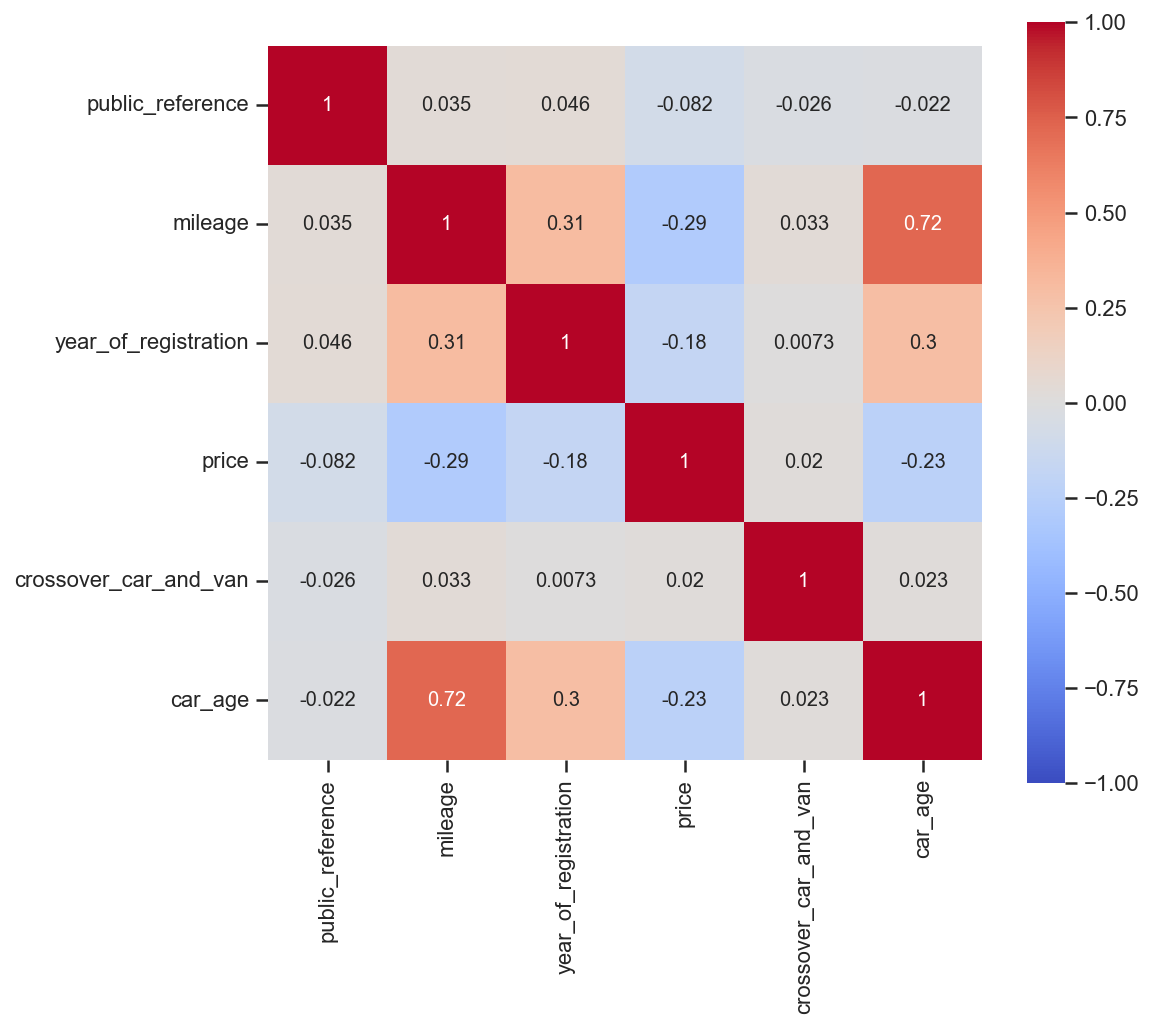

In [83]:
# Checking correlation of numerical columns with price

plt.figure(figsize=(8,7))
sns.heatmap(auto.corr(), square=True, annot=True, vmin=-1, vmax=1, cmap='coolwarm');

 * The heatmap shows a strong positive correlation between mileage and car age.


**Question: Is there a difference in numerical feature correlations between the two types of vehicle conditions?**

In [84]:
## Subsetting tthe data int new and used cars

# New cars
new_cars = auto[auto['vehicle_condition']=='new']

# Used cars
used_cars = auto[auto['vehicle_condition']=='used']

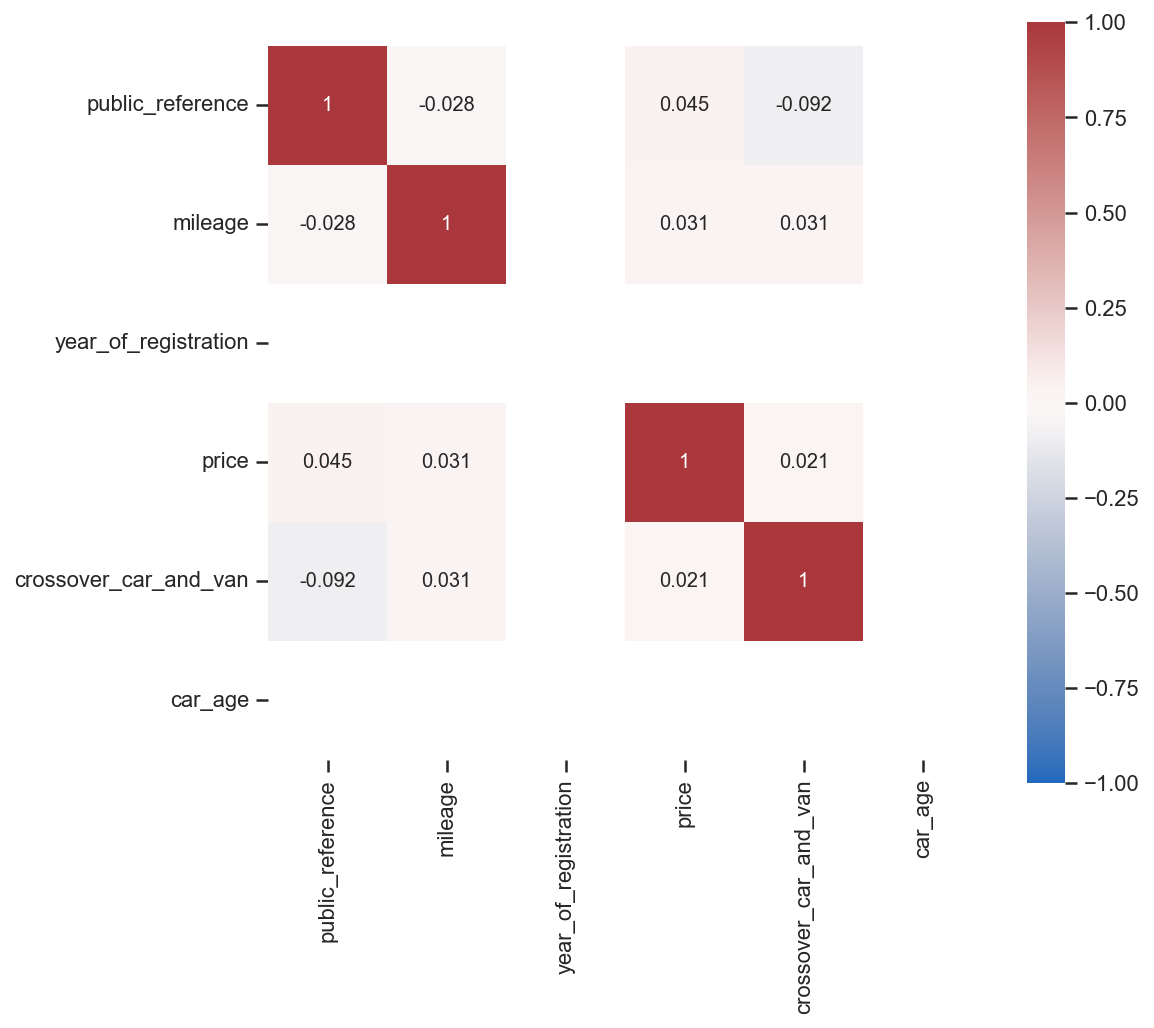

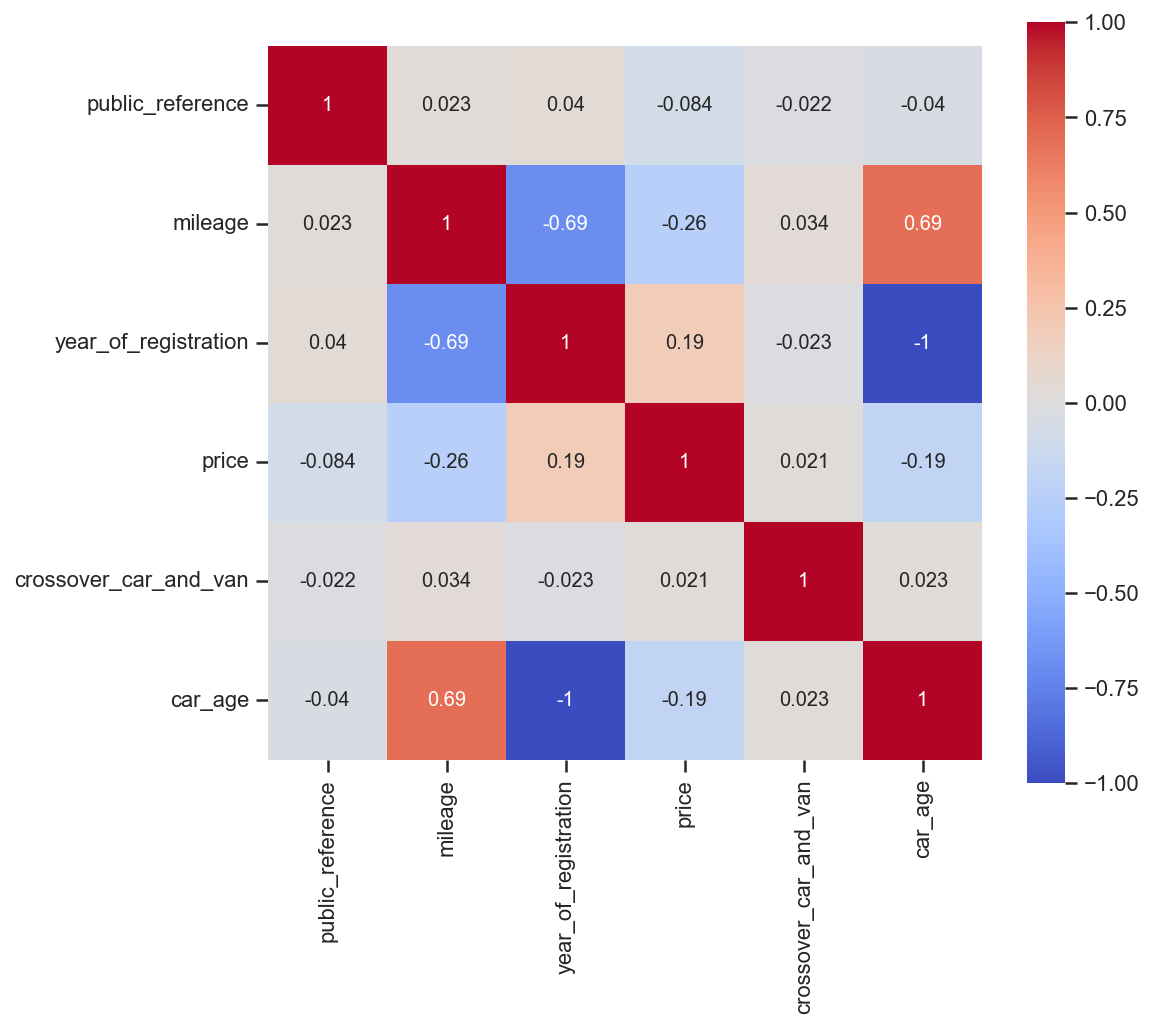

In [85]:
# Checking correlation of numerical columns with price for new cars

plt.figure(figsize=(8,7))
sns.heatmap(new_cars.corr(), square=True, annot=True, vmin=-1, vmax=1, cmap='vlag');

# Checking correlation of numerical columns with price for used cars
plt.figure(figsize=(8,7))
sns.heatmap(used_cars.corr(), square=True, annot=True, vmin=-1, vmax=1, cmap='coolwarm');

* From the heatmaps of the new and used car subsets. There is no significant difference in the numerical feature correlations between new and used cars.

# 3. Association and Group Differences Analysis

## 3.1. Quantitative-Quantitative

### Mileage against price

**Question: Is the relationship between mileage and price the same for new and used cars?**

Text(0.5, 1.0, 'MIleage against against price - USED CARS (PLOT B)')

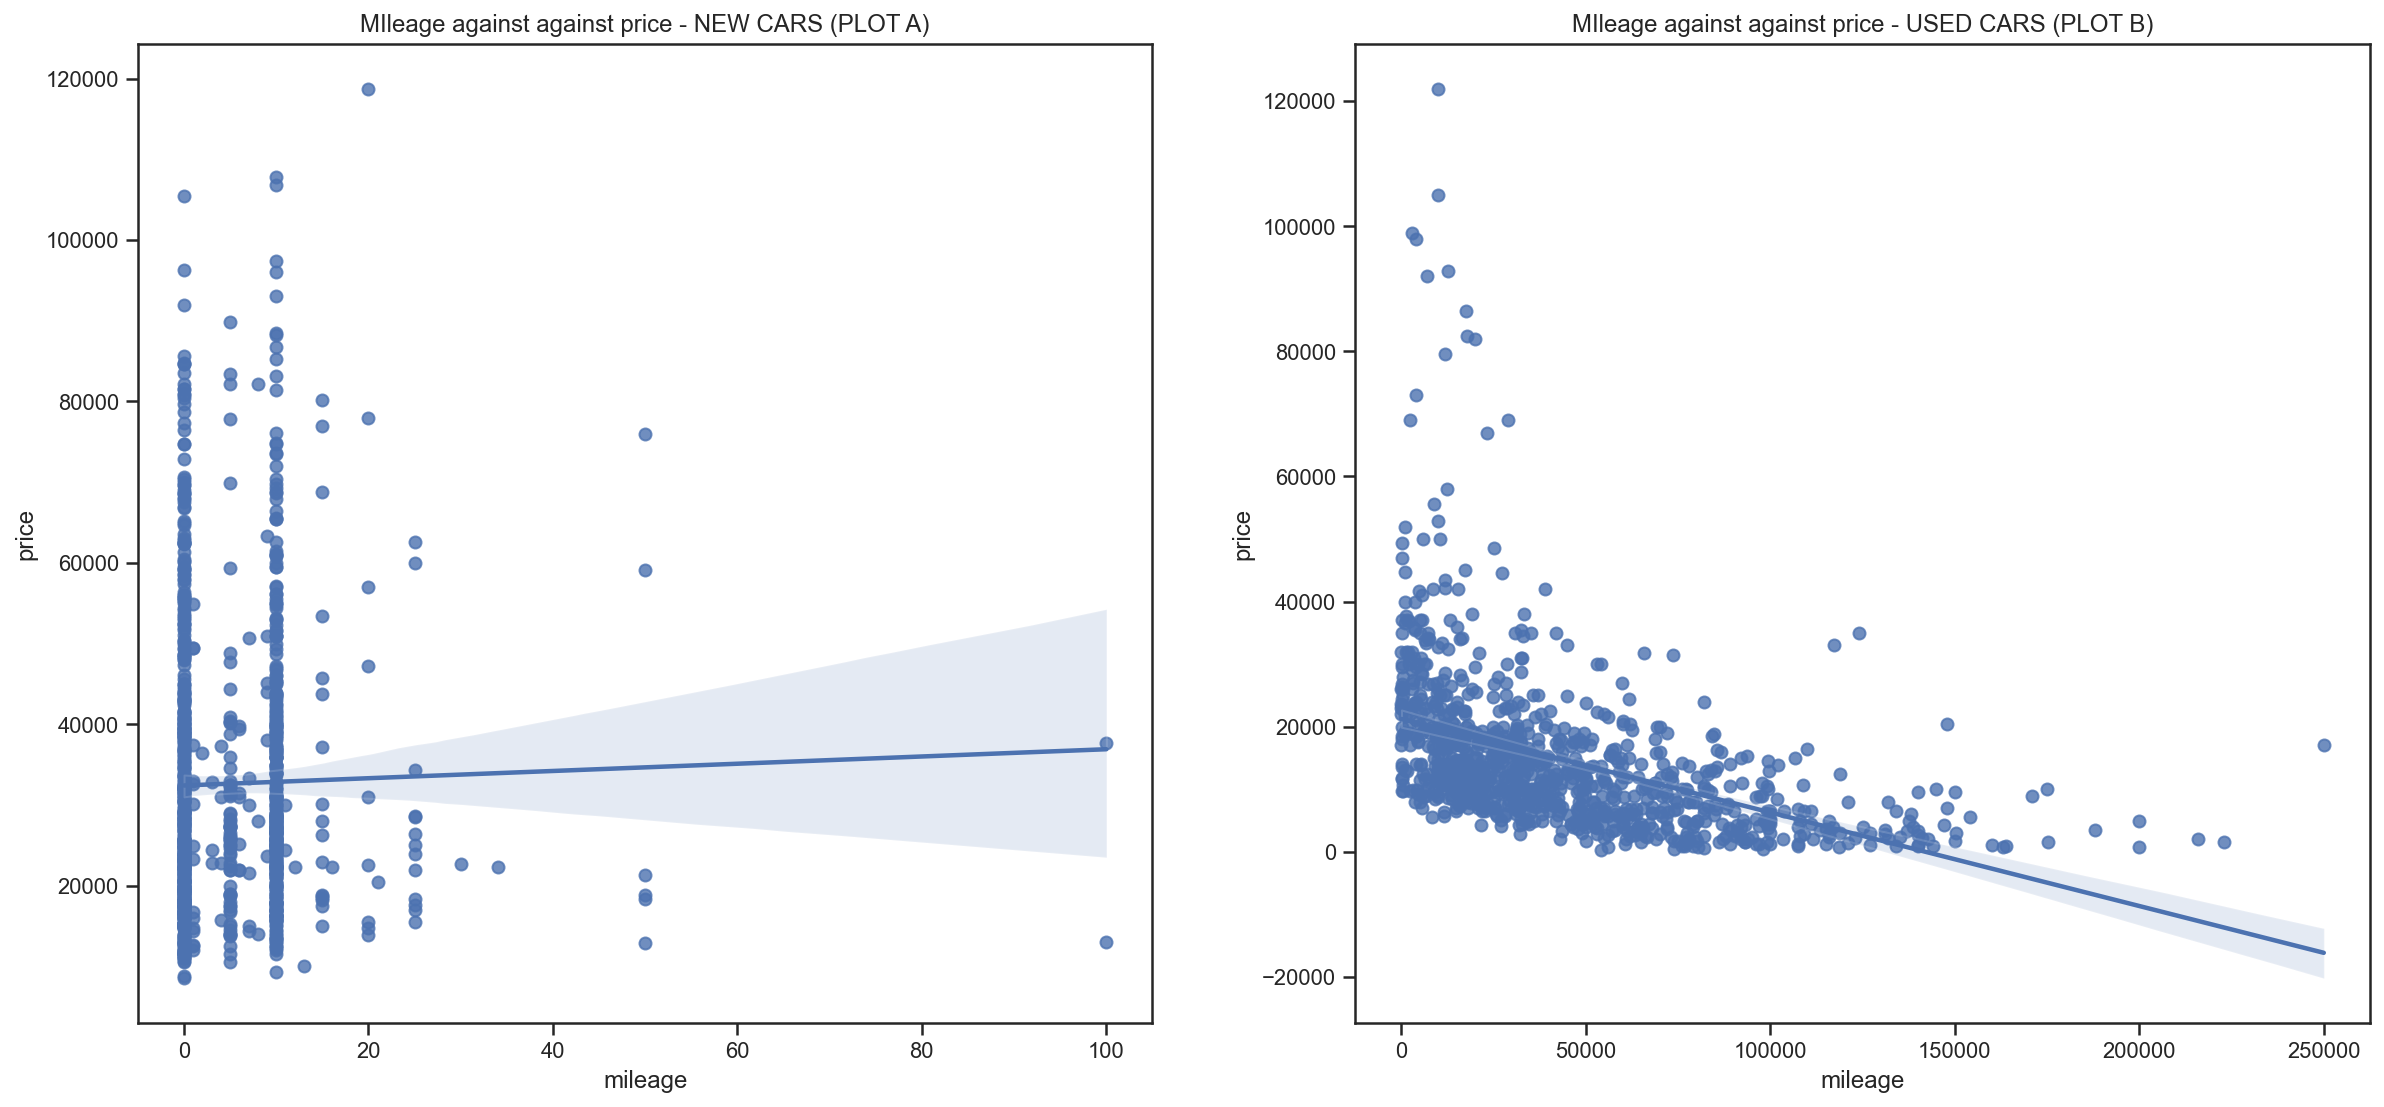

In [86]:
# Mileage against price regression plots using equal sample sizes for new and used cars.
fig, axs = plt.subplots(1, 2, figsize=(20, 9))

sample_new_cars = new_cars.sample(n=1000, random_state=45)
sns.regplot(data=sample_new_cars , x='mileage', y='price', ax=axs[0])
axs[0].set_title("MIleage against against price - NEW CARS (PLOT A)")

sample_used_cars = used_cars.sample(n=1000, random_state=45)
sns.regplot(data=sample_used_cars, x='mileage', y='price', ax=axs[1])
axs[1].set_title("MIleage against against price - USED CARS (PLOT B)")


* Plot A has a zero slope. This indicates that there is no relationship between the mileage and the price of a new car.

* Plot B has a negative slope. This indicates that, for used cars, as mileage increases, the price of the car decreases.

* From both plots, it can be concluded that new and used cars do not have the same relationship between mileage and price.

* In summary, there is a reasonable relationship between the mileage and price of used cars. This is validated by the negative slope of the regression plot. It simply means that the more mileage a car travels, the less valuable it becomes. This is true, as wear and tear are likely to increase with usage.

### Year of registration against price

**Question: Is the relationship between year of registration and price the same for new and used cars?**

Text(0.5, 1.0, 'Year of registration against price - NEW CARS (PLOT D* As expected, plot C shows that there is no correlation between the year of registration and the price of new cars.')

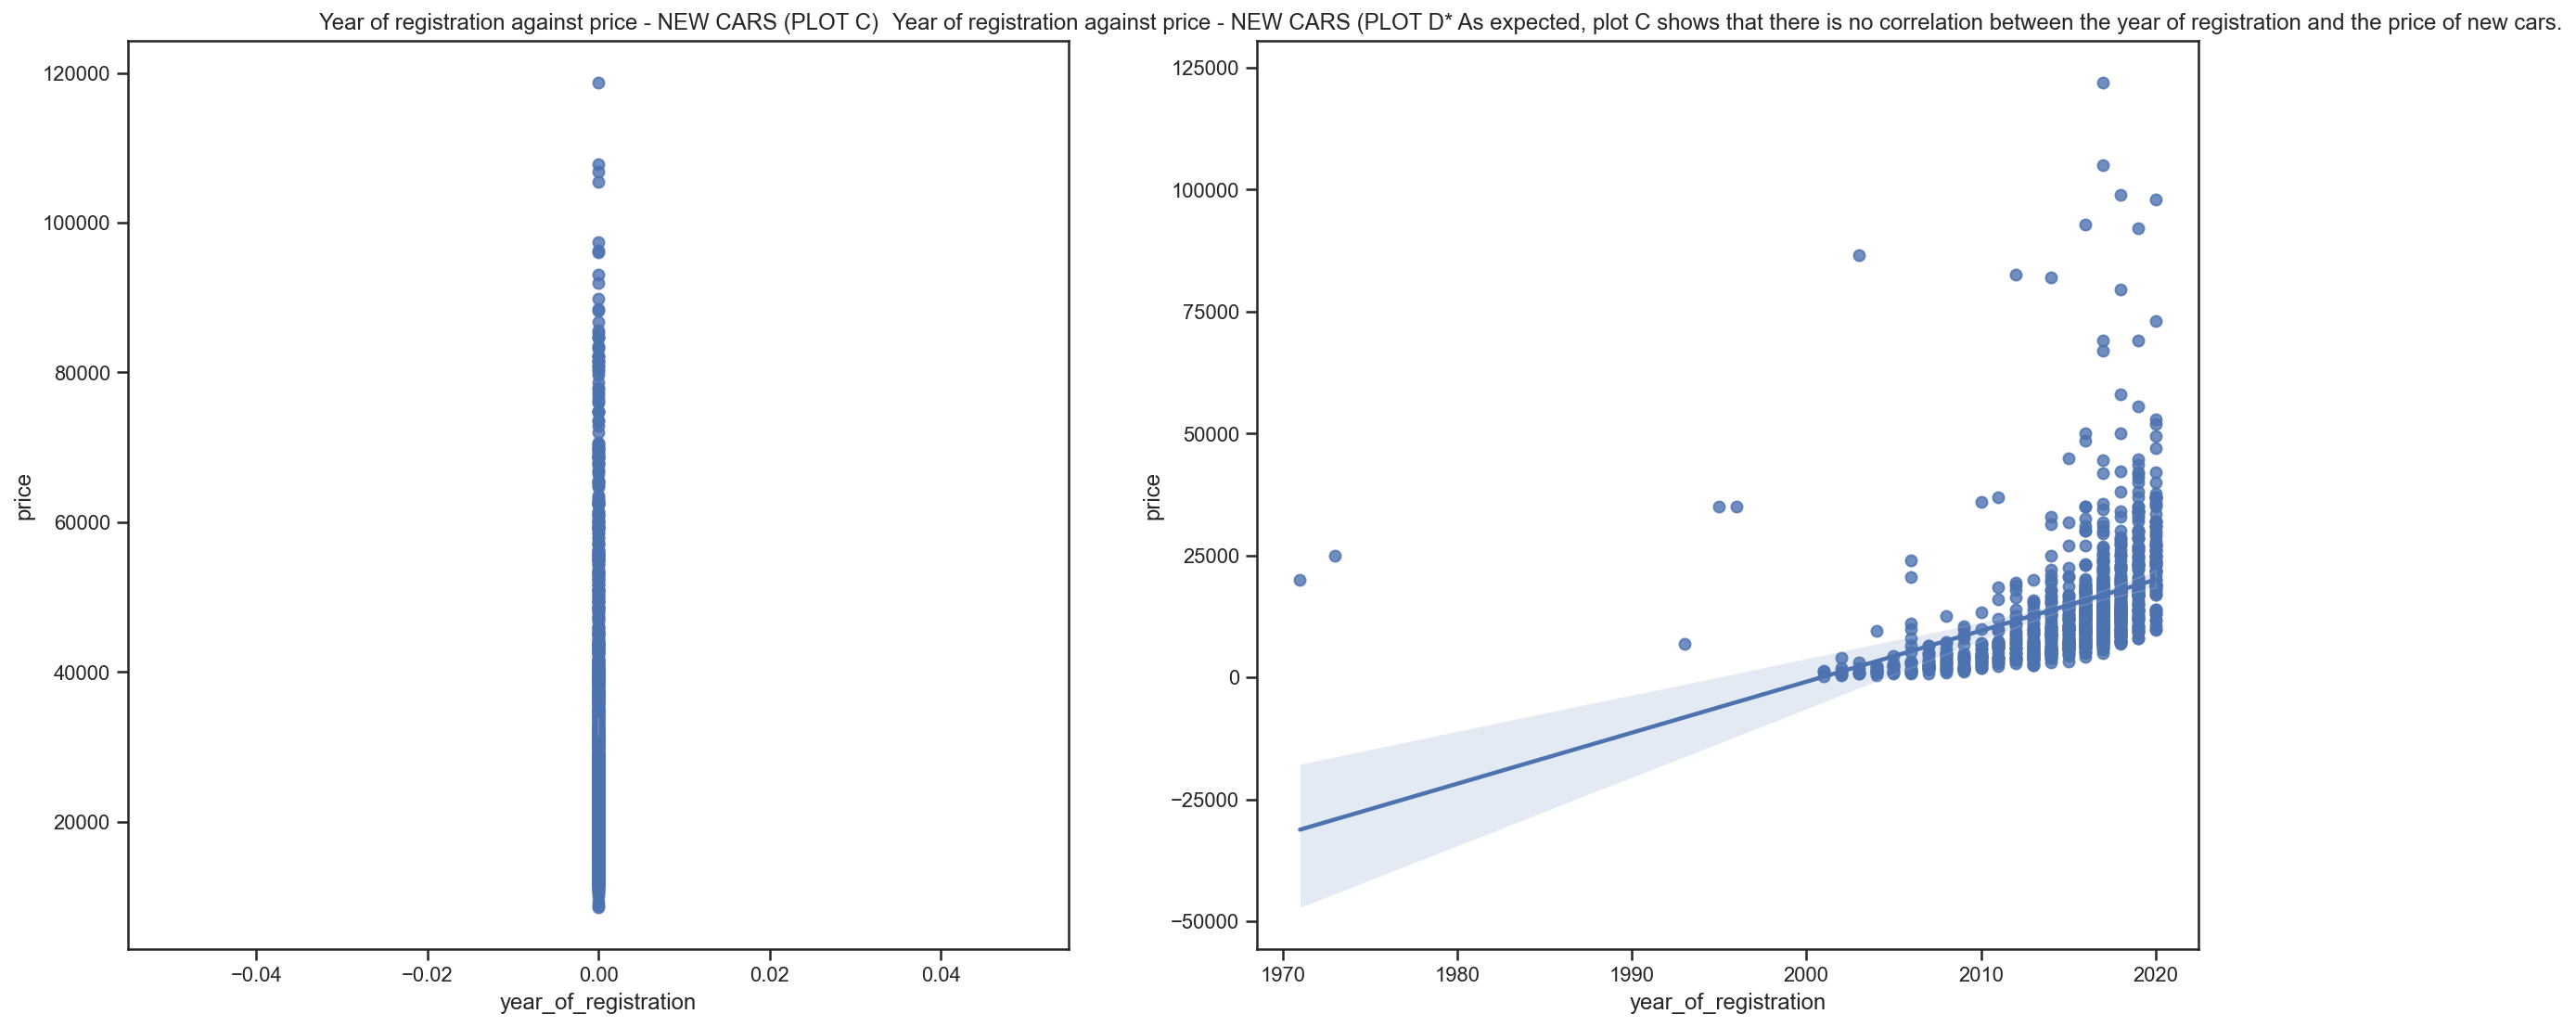

In [87]:
# Year or registration against price regression plots using equal sample sizes for new and used cars.
fig, axs = plt.subplots(1, 2, figsize=(20, 9))
sample_new_cars = new_cars.sample(n=1000, random_state=45)
sns.regplot(data=sample_new_cars , x='year_of_registration', y='price', ax=axs[0])
axs[0].set_title("Year of registration against price - NEW CARS (PLOT C)")

sample_used_cars = used_cars.sample(n=1000, random_state=45)
sns.regplot(data=sample_used_cars, x='year_of_registration', y='price', ax=axs[1])
axs[1].set_title("Year of registration against price - NEW CARS (PLOT D* As expected, plot C shows that there is no correlation between the year of registration and the price of new cars.")

* As expected, plot C shows that there is no correlation between the year of registration and the price of new cars.
* Plot D shows a positive slope. This indicates that for used cars, as the year of registration increases, the price of the cars also increases. This is the inverse of the car age and price relationship.

## 3.2. Quantitative-Categorical

### Fuel type against price

<Figure size 1080x504 with 0 Axes>

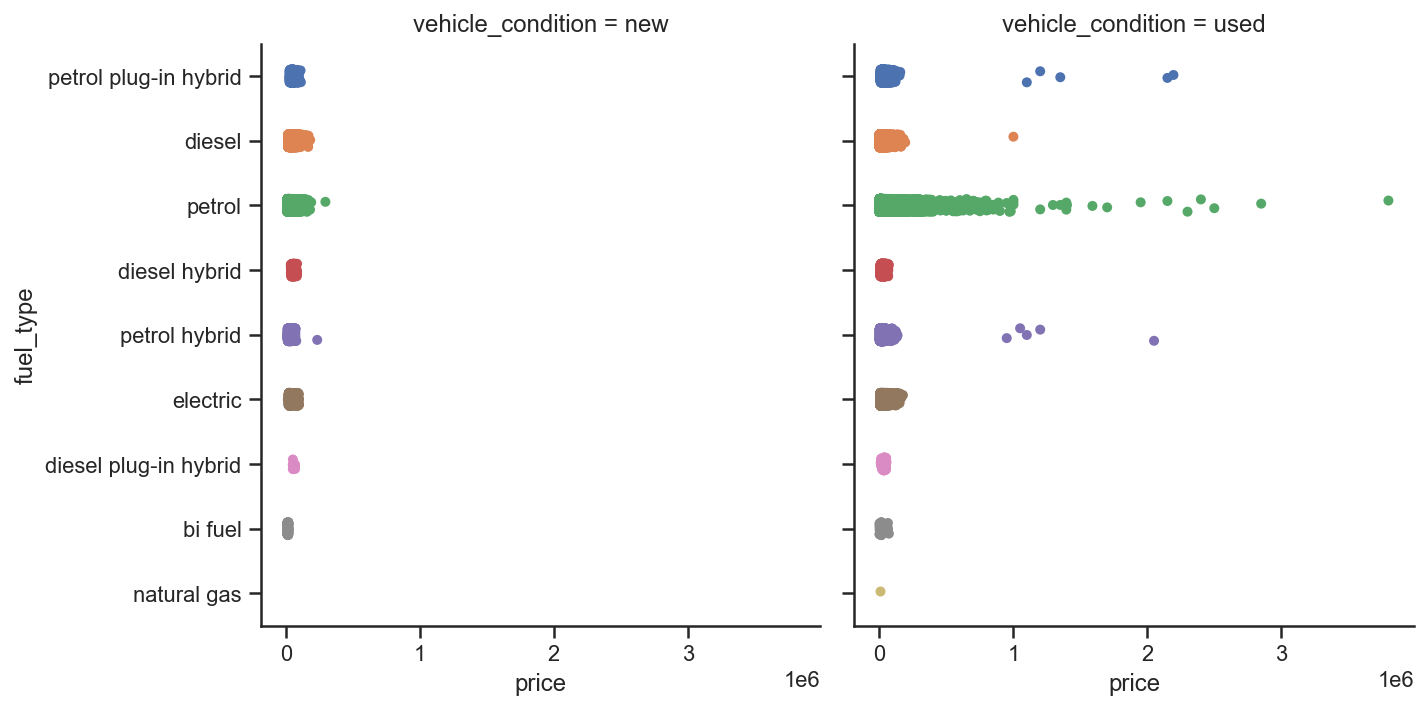

In [88]:
plt.figure(figsize=(15,7))
sns.catplot(data=auto, col= 'vehicle_condition', x='price', y='fuel_type')

* According to the plot, petrol vehicles have a wider price spread, particularly among used vehicles. This indicates that petrol cars have more price variations than other fuel types.

### Body Type against Price

<AxesSubplot:xlabel='price', ylabel='body_type'>

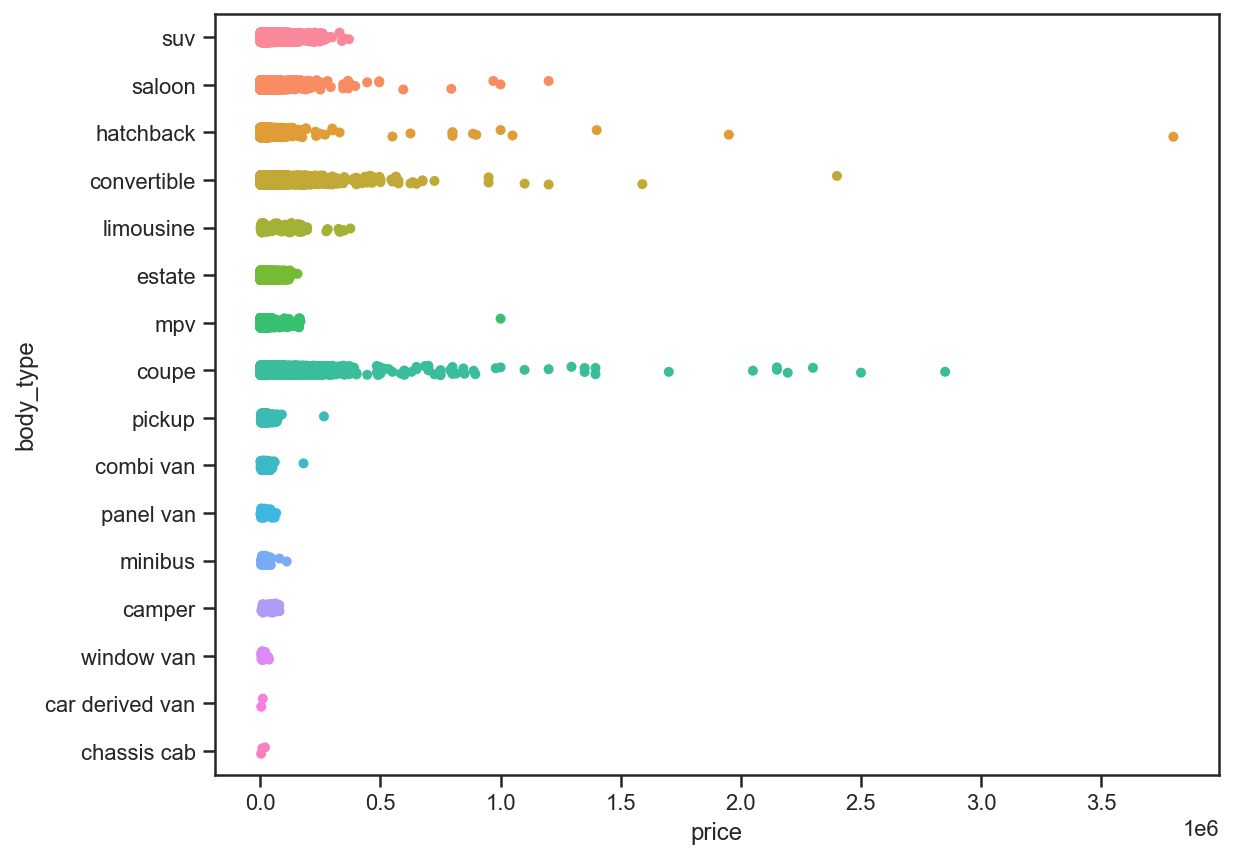

In [89]:
plt.figure(figsize=(9,7))

sns.stripplot(data=auto, x='price', y='body_type')

The plot establishes a wider price spread for cars with coupe body types. It's not totally clear at this point if they are the most expensive body types; however, there seems to be a lot of buyer interest.

### Top 5 makes against price

In [90]:
# Top 10 standard makes by frequency
auto['standard_make'].value_counts().head(10)

bmw              37359
audi             35263
volkswagen       34236
vauxhall         33673
mercedes-benz    31893
nissan           19870
toyota           17656
peugeot          15146
land rover       14769
renault          12811
Name: standard_make, dtype: int64

In [91]:
# Creating a subset of top 10 standard makes by frequency
top_10_makes = (auto.loc[(auto['standard_make']== 'bmw') | (auto['standard_make']== 'audi') 
                         | (auto['standard_make']== 'volkswagen')| (auto['standard_make']== 'vauxhall')
                         | (auto['standard_make']== 'mercedes-benz') | (auto['standard_make']== 'nissan') 
                         | (auto['standard_make']== 'toyota') | (auto['standard_make']== 'peugeot') 
                         | (auto['standard_make']== 'land rover') | (auto['standard_make']== 'renault')])

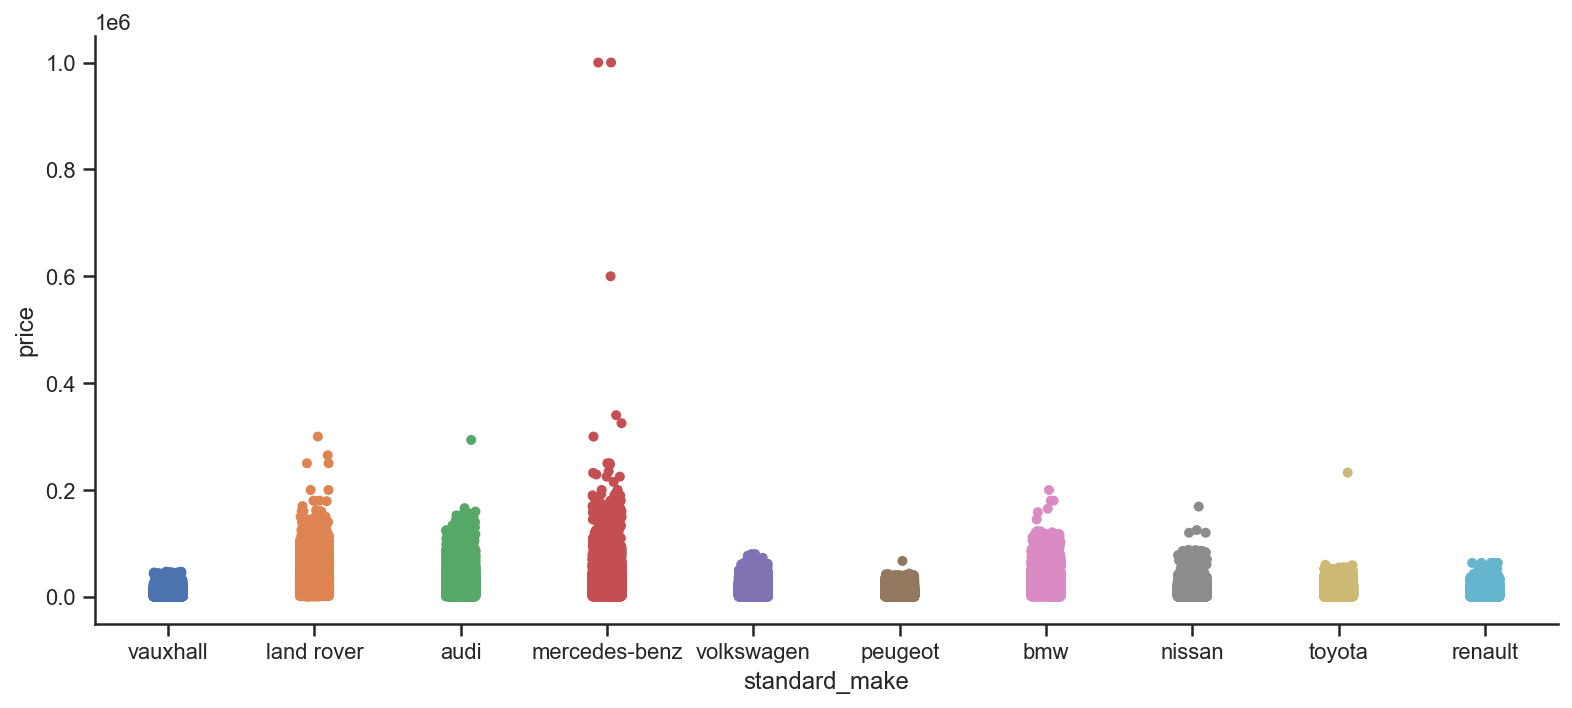

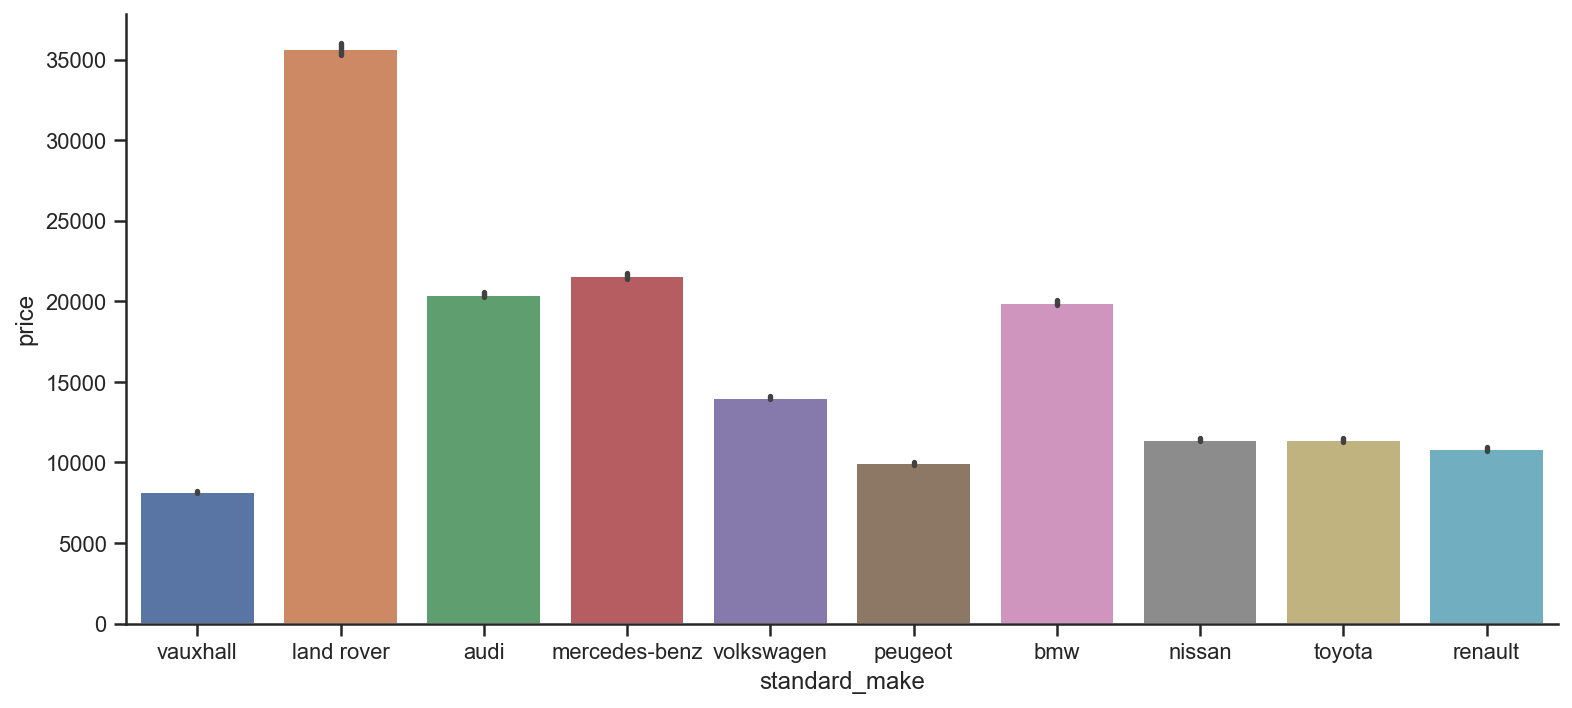

In [92]:
# Plots comparing standard makes against price
sns.catplot(data=top_10_makes, x='standard_make', y='price', height=5, aspect=2.2)
sns.catplot(data=top_10_makes, x='standard_make', y='price', kind='bar', height=5, aspect=2.2)

* Among the top five cars based on frequency, the Land Rover typically costs more. There are brands with low frequencies that may be more expensive, like Ferrari, for example. It however cannot be generalized at this point.
* Also, there were no significant patterns from which to draw conclusions on the relationship between the standard make and car prices. Although brands like Ferrari, Aston Martin, Rolls-Royce, Lamborghini, and Bugatti are relatively more expensive than other brands, this is true as they are some of the luxury cars of today.

## 3.3. Categorical-Categorical

### Vehicle Condition against Fuel Type

<AxesSubplot:xlabel='vehicle_condition', ylabel='price'>

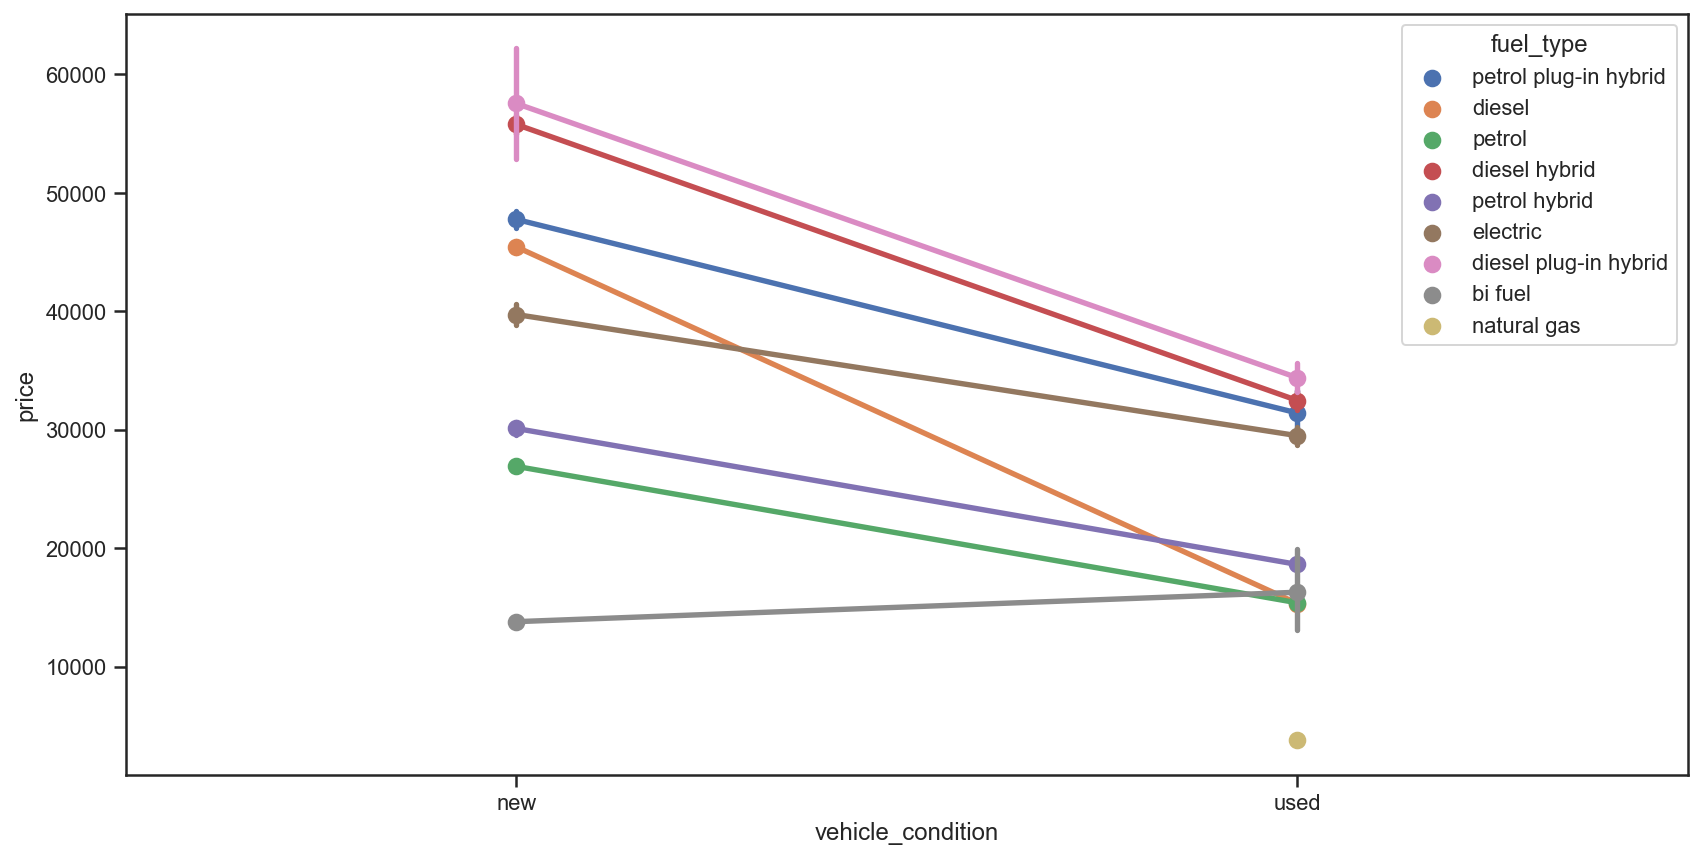

In [93]:
plt.figure(figsize=(14,7))

sns.pointplot(data=auto, x='vehicle_condition', y='price', hue='fuel_type')

<AxesSubplot:xlabel='fuel_type', ylabel='price'>

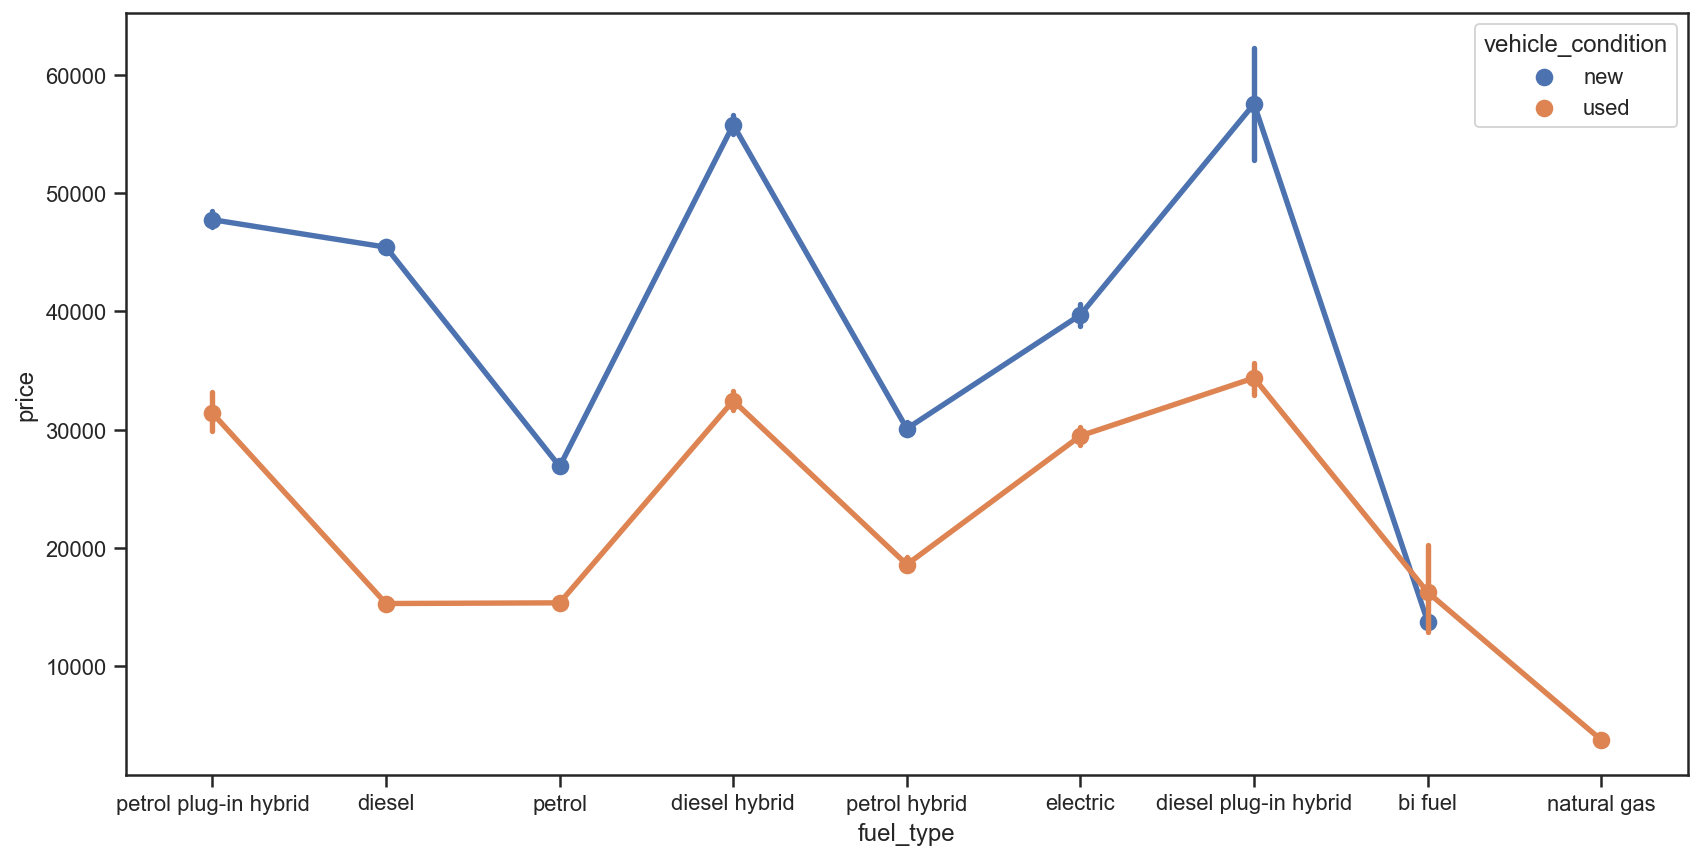

In [94]:
plt.figure(figsize=(14,7))

sns.pointplot(data=auto, x='fuel_type', y='price', hue='vehicle_condition')

* From the point plots, the relationship between new and used cars with price in terms of the fuel type is shown.
* For fuel type, although petrol and diesel cars are more common across various brands, the average prices seem normally distributed. The plot above shows that, on average, the diesel plug-in hybrid cars are more expensive across the new and old cars. This may be a result of the combined diesel and electric engine technology.
* An interesting observation can be made regarding the average price of new and used diesel fuel-type cars. New diesel cars are far more expensive compared to used ones. This may be a result of the maintenance and repair costs seen in today's automobile market.

### Fuel Type against Body Type

Text(0.5, 1.0, 'Year of registration against price - NEW CARS (PLOT C)')

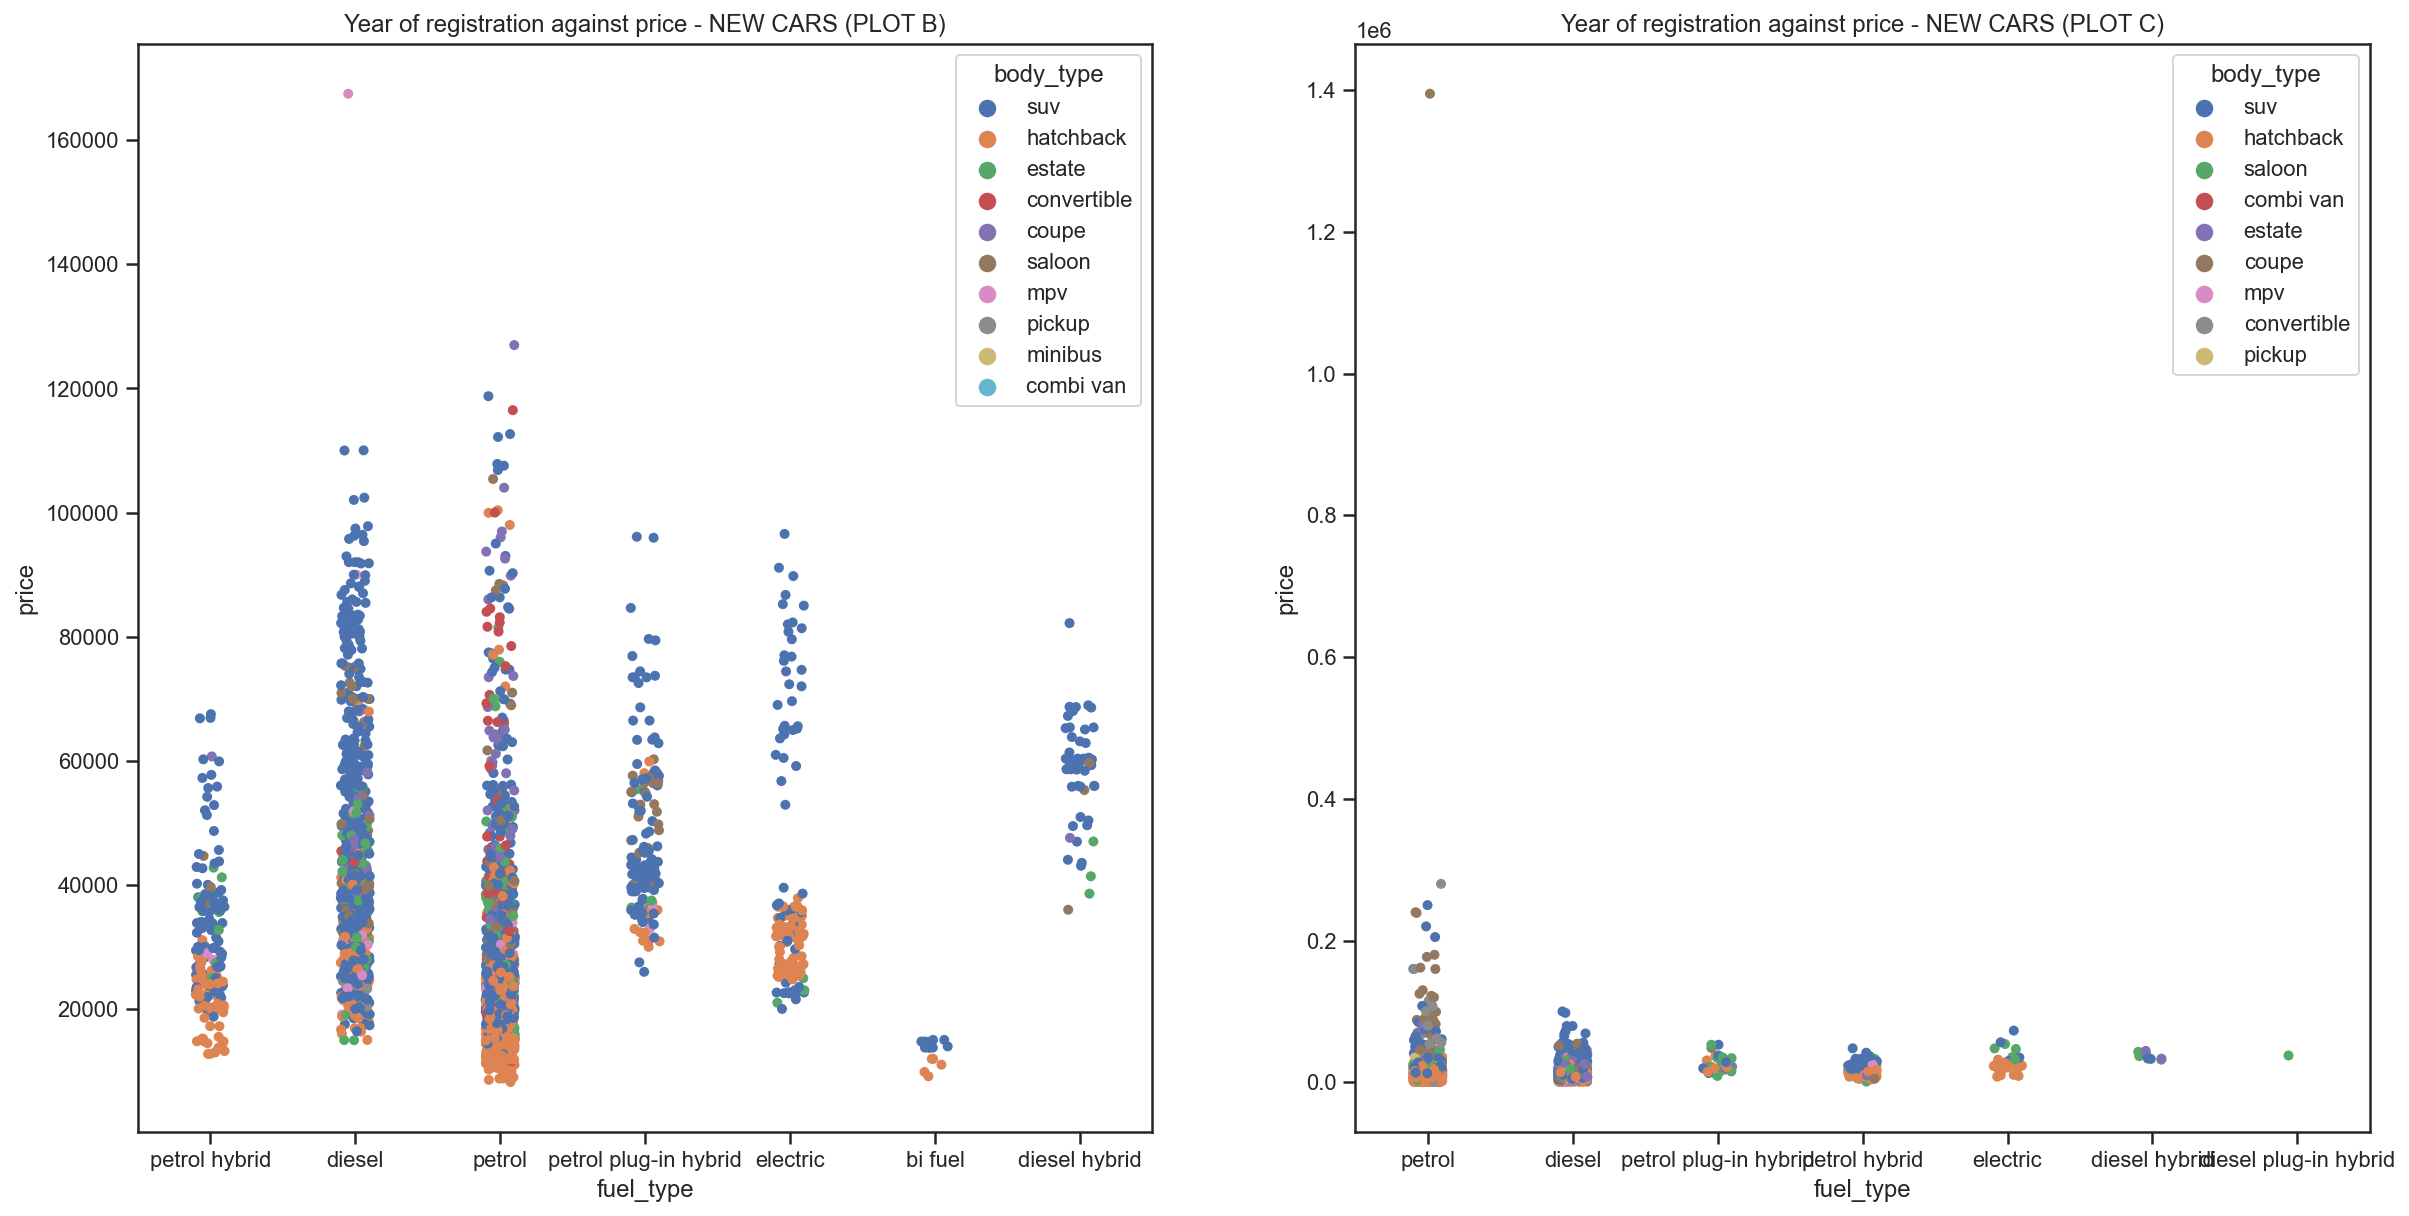

In [95]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
sample_new_cars = new_cars.sample(n=3000, random_state=45)
sns.stripplot(data=sample_new_cars,  x='fuel_type', y='price', hue='body_type', ax=axs[0])
axs[0].set_title("Year of registration against price - NEW CARS (PLOT B)")

sample_used_cars = used_cars.sample(n=3000, random_state=45)
sns.stripplot(data=sample_used_cars,  x='fuel_type', y='price', hue='body_type', ax=axs[1])
axs[1].set_title("Year of registration against price - NEW CARS (PLOT C)")

<AxesSubplot:xlabel='fuel_type'>

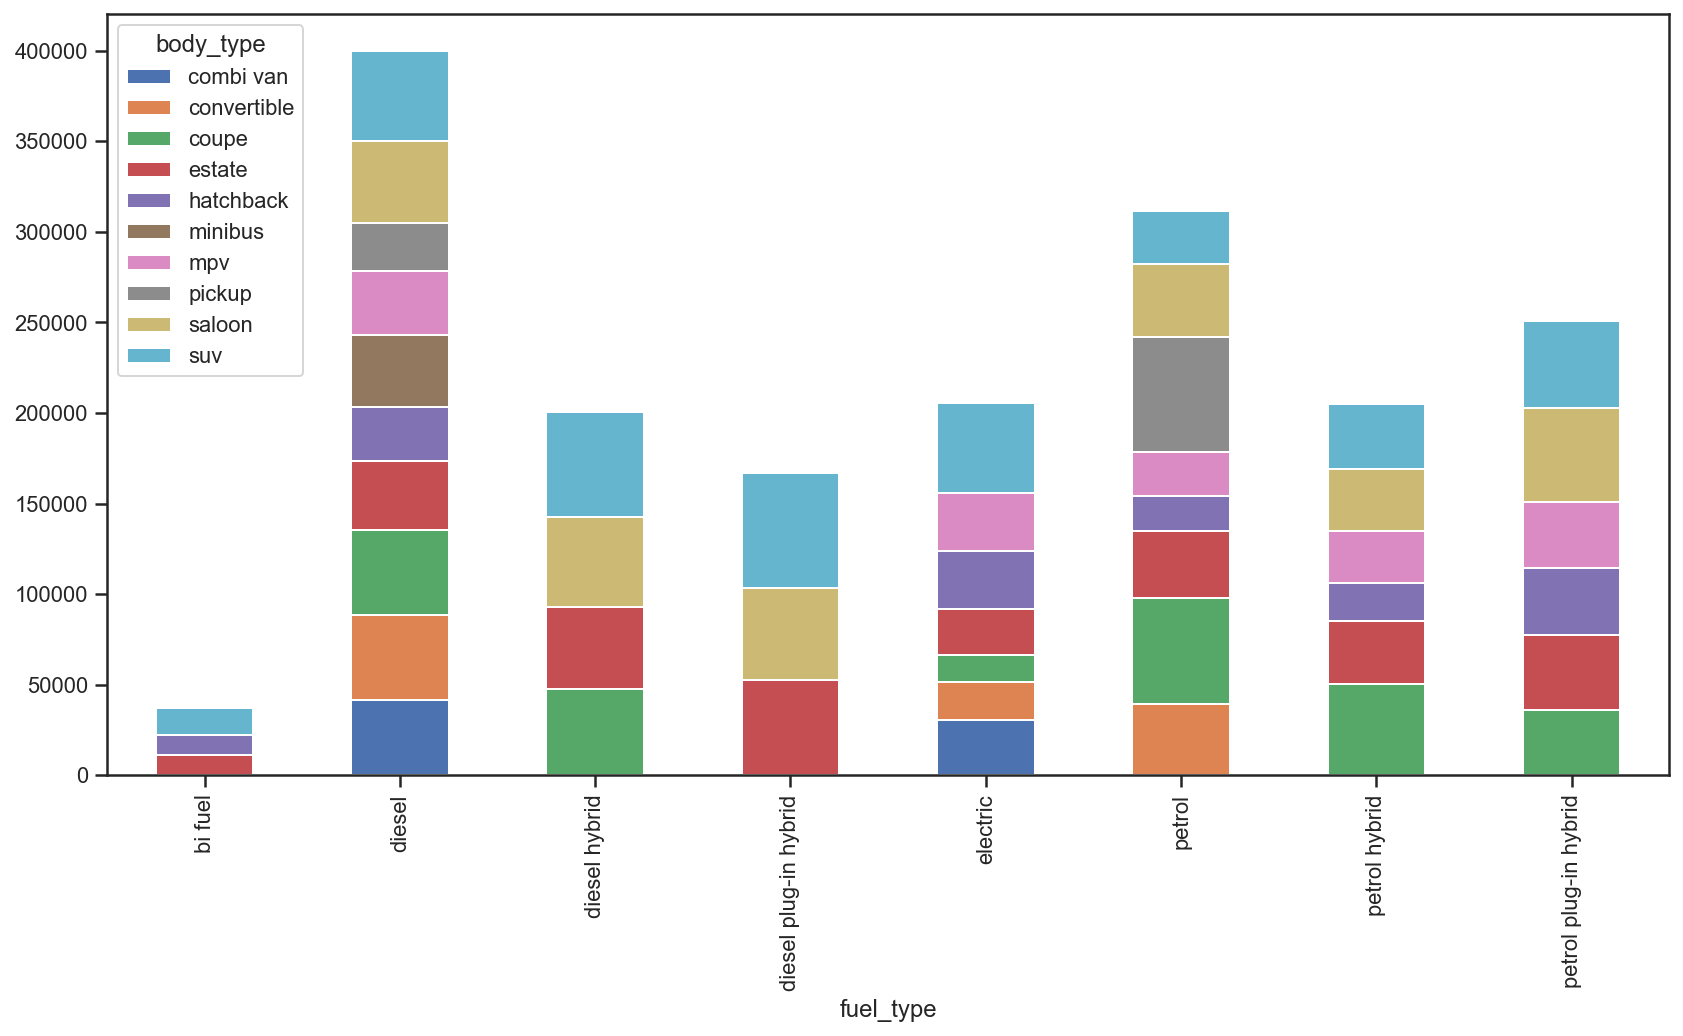

In [96]:
mean_fuel_type = pd.pivot_table(new_cars, index='fuel_type', columns='body_type', values='price', aggfunc='mean')

mean_fuel_type.plot.bar(stacked=True, figsize=(14,7))

The plots establish a claim that SUV cars are not only one of the most common car body types but that, on average, they are more expensive across a number of fuel types. This is also true across the colour types.

# Conclusion

* When predicting the price of new cars, the age of the car is a good indicator, although variations may occur depending on the make of the car. However, combining the age of the car with the make can improve the accuracy of the prediction. 

* For used cars, mileage is a good indicator, but this may not hold true for cars of the same make and model registered in different years or for different makes registered in the same year. Combining the age, model, and mileage of the used car can improve the accuracy of the prediction. However, we can conclude that for two used cars with same features, the car with higher mileage generally tends to be priced lower.

* No clear conclusion could be drawn about the impact of car color on its price, as no significant patterns were identified. Cars with popular colors such as black, red, silver, blue, yellow, and green appear to be priced higher, which may be because manufacturers tend to offer these colors on a greater proportion of their cars.

* In summary, there is no 'one-size-fits-all' in determining the price value of cars. That is, detemining the value of new and used cars is complex and there is no single factor that can be used to accurately predict the price. There are a range of features to consider and depending of the combination of these features, the price varies differently. A combination of features such as age, model, and mileage may be used to improve the accuracy of estimate. It's crucial for business owners to understand that while predictions can be useful, they should not replace the need for physical inspection and examination. 